# Othello(Reversi) - "A minute to learn...A lifetime to master"

*by Anurag Kumar (anuragk@colostate.edu), December, 2017*

## Table of Contents
* [Introduction](#Introduction)
* [Methods](#Methods)
	* [Negamax with Alpha-Beta Prunning](#Negamax-with-Alpha-Beta-Prunning)
	* [Reinforcement Learning using Q-Table](#Reinforcement-Learning-using-Q-Table)
	* [Reinforcement Learning using Q-net](#Reinforcement-Learning-using-Q-net)
* [Results](#Results)
* [Conclusions](#Conclusions)
* [References](#References)

## Introduction

The game playing ability of AI bots reached an all new level when AlhpaGo defeated the Go world champion. The algorithmic breakthrough here was the use of deep neural networks and reinforcement learning. This achievement has proven that computers can surpass humans in very specific kind of decision-making problems. I am very much fascinated by these results and it's application across various domains. So, I choose a game which is somewhat similar to Go but slightly less complicated and is called Othello(also known as Reversi) as my project. Let me briefly describe the game.

[Reversi](https://en.wikipedia.org/wiki/Reversi) (Othello) is a strategy board game for two players, played on an 8×8 uncheckered board. There are sixty-four identical game pieces called disks (often spelled "discs"), which are light on one side and dark on the other. Players take turns placing disks on the board with their assigned color facing up. During a play, any disks of the opponent's color that are in a straight line and bounded by the disc just placed and another disk of the current player's color are turned over to the current player's color.
The objective of the game is to have the majority of discs turned to display your color when the last playable empty square is filled.

Starting state:
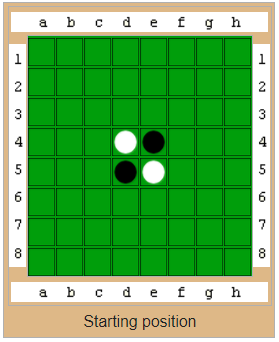

Winning State: The player with the maximum number of discs at the end wins the game.

In this project, I will start with smaller version of the game i.e. 4x4 board and then try the same for 6x6 and 8x8 boards. I have used three methods for traversing the game search tree(order of 10<sup>58</sup>) namely Negamax with Alpha-Beta pruning[Chuck], Reinforcement Learning using Q function[Chuck] and Reinforcement Learning using Qnet[Chuck]. The number of legal positions in a standard game is of the order of 10<sup>28</sup>, so, I thought that it would be a big challenge to search the entire game tree or store all possible state, action pair in any data structure. Therefore, I used Q functions trained by either the Q-table or the Qnet over a finite set of data in order to predict the best possible action for any given state. As the tagline of the game describes itself as a game which takes *"a minute to learn...a lifetime to master"* is very apt and that is the reason that the results of these methods are very interesting and counter-intuitive. 

*Also, I would like to state that all the methods used in this project have no prior knowledge about the game except for the rules of the game or in other words, there is no strategy or approach hardcoded in these methods for playing the game.*

## Methods

Before we get into the methods, let me quickly establish few things which will be used throughout the description. 
The starting state is represented as shown in the fig. below:

`- a b c d e f g h
1| | | | | | | | |
2| | | | | | | | |
3| | | | | | | | |
4| | | |O|X| | | |
5| | | |X|O| | | |
6| | | | | | | | |
7| | | | | | | | |
8| | | | | | | | |
`

The white discs are represented with letter 'O' and black discs are represented with letter 'X'.
As per the rules player with black discs plays first, so player 'X' will play first. The set of valid moves available for 'X' are {5f,3d,6e,4c}

Let's say it selects 5f, so the newState after the move will be

`- a b c d e f g h
1| | | | | | | | |
2| | | | | | | | |
3| | | | | | | | |
4| | | |O|X| | | |
5| | | |X|X|X| | |
6| | | | | | | | |
7| | | | | | | | |
8| | | | | | | | |
`

Now, its 'O's turn and the set of valid moves available are {6d,4f,6f}
Let's say it selects 6f, so the newState after this move will be

`- a b c d e f g h
1| | | | | | | | |
2| | | | | | | | |
3| | | | | | | | |
4| | | |O|X| | | |
5| | | |X|O|X| | |
6| | | | | |O| | |
7| | | | | | | | |
8| | | | | | | | |
`

and the game will go on till the board us filled completely or no valid move is available. Then the player with the maximum number of discs wins the game.
Since I will begin with a 4x4 board which will look like this:

`- a b c d 
1| | | | |
2| |O|X| |
3| |X|O| |
4| | | | |
`

For computation I will representent the state as list . For example the starting state of 4x4 board will be `[' ',' ',' ',' ',' ','O','X',' ',' ','X','O',' ',' ',' ',' ',' ']`. 
All the other rules will remain the same.

The following functions described below are some of the important functions used to implement the game:
* $startState(m)$ - It takes an integer as input to generate the starting state according the board size(mxm).
* $printState(state)$ - It takes state as an input and prints the output as shown above.
* $winner(state)$ - It takes state as input and determines if the given state has a winner or if it's a 'draw'.
* $validMoves(state, player)$ - It returns all possible moves for the given state and player.
* $makeMove(state, move, player)$ - It places the new disc at the position given in form of the move and flips all the other discs in all possible directions.
* $getMoves(state, player)$ - It calls the validMoves() and if the list of moves is empty it adds [-1] (`-1` means there is no move available to play, so the player can pass its move) to the list.  
* $epsilonGreedy(epsilon, Q, state)$ - It selects a move either randomly or according to the reinforcement value depending on the epsilon value.
* $trainQ(startState, maxGames, rho, epsilonDecayRate)$ - trains Q-table for the given parameters and returns Q, outcomes, epsilons
* $testQ(startState, Q, maxSteps, validMovesF, makeMoveF)$ - It returns a path from starting state to the winning state if it exists.
* $newStateRep(state)$ - It converts the state into form where 'X','O' and ' ' are replaced by '1','-1' and '0' respectively. This representation is used for neural networks.
* $epsilonGreedyQnet(Qnet, state, epsilon, validMovesF)$ - It takes the parameters to predict the next best move and returns move and Q
* $trainQnet(startState, nReps, hiddenLayers, nIterations, nReplays, epsilon, epsilonDecayFactor, validMovesF, makeMoveF)$ - It takes all the parameters and generate samples from 'nReps' and then trains the neural network for the given structure of 'hiddenLayers' for 'nIterations' and returns 'Qnet', 'outcomes', 'epsilons' and 'samples'
* $testQnet(startState, Qnet, maxSteps, validMovesF, makeMoveF)$ - It finds a path from starting state to the winning state for the given parameters.



Now as we know all the notations and functions used in this notebook, let's go through all the methods one by one. 

In [1]:
import Reversi_Script as rv
import numpy as np
%matplotlib inline

Here are some examples of the functions defined in Reversi_Script.py

In [2]:
rv.startState(4)

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'O',
 'X',
 ' ',
 ' ',
 'X',
 'O',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [3]:
state = rv.startState(4)

In [4]:
rv.printState(state)

| | | | |
| |O|X| |
| |X|O| |
| | | | |


In [5]:
rv.winner(['X']*9+['O']*7)

'X'

In [6]:
rv.validMoves(state, 'X')

[4, 14, 11, 1]

In [7]:
a = rv.makeMove(state, 4, 'X')

In [8]:
rv.printState(a)

| | | | |
|X|X|X| |
| |X|O| |
| | | | |


### Negamax with Alpha-Beta Prunning

The NegamaxAB [Chuck, A4] method tries to find a move that may result in a win by going through the game search tree. I used iterative depth-first search[Russell and Norvig, 2014] to find a move in a finite number of steps. In this method, the opponent plays the first move available. This method as shown below did work for the 4x4 board but failed to find winning move for both 6x6 and 8x8 boards. The reason it failed may be because as Negamax[Russell and Norvig, 2014] assumes that the opponent is going to play the best move, so if there is no winning move then it stops the search and does not play for a draw. I was unable to force it to play for a draw because I had to also ensure that all the rules are followed as a player is also allowed to pass it's turn if no move is available. I did not try to solve this issue and moved on to the next method but I think MiniMax method will work for this game even though I did not try that because I was more interested in reinforcement learning methods.

In [2]:
game = rv.Reversi(4)
rv.playGameIDSab(game, rv.opponent, 20)
game.getNumberMovesExplored()

| | | | |
| |O|X| |
| |X|O| |
| | | | |


Player X to 4 for score 1
| | | | |
|X|X|X| |
| |X|O| |
| | | | |


Player O to 8
| | | | |
|X|X|X| |
|O|O|O| |
| | | | |


Player X to 12 for score 1
| | | | |
|X|X|X| |
|X|X|O| |
|X| | | |


Player O to 2
| | |O| |
|X|X|O| |
|X|X|O| |
|X| | | |


Player X to 7 for score 1
| | |O| |
|X|X|X|X|
|X|X|O| |
|X| | | |


Player O to 0
|O| |O| |
|X|O|X|X|
|X|X|O| |
|X| | | |


Player X to 1 for score 1
|O|X|O| |
|X|X|X|X|
|X|X|O| |
|X| | | |


Player O to None
|O|X|O| |
|X|X|X|X|
|X|X|O| |
|X| | | |


Player X to 3 for score 1
|O|X|X|X|
|X|X|X|X|
|X|X|O| |
|X| | | |


Player O to None
|O|X|X|X|
|X|X|X|X|
|X|X|O| |
|X| | | |


Player X to 15 for score 1
|O|X|X|X|
|X|X|X|X|
|X|X|X| |
|X| | |X|



257

In [3]:
game1 = rv.Reversi(6)
rv.playGameIDSab(game1, rv.opponent, 20)
game1.getNumberMovesExplored()

| | | | | | |
| | | | | | |
| | |O|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |


Player X to 13 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |


Player O to 19
| | | | | | |
| | | | | | |
| |X|X|X| | |
| |O|O|O| | |
| | | | | | |
| | | | | | |


Player X to 25 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
| |X|X|O| | |
| |X| | | | |
| | | | | | |


Player O to 18
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|O|O| | |
| |X| | | | |
| | | | | | |


Player X to 27 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|X|X| | |
| |X| |X| | |
| | | | | | |


Player O to 32
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|X|X| | |
| |O| |X| | |
| | |O| | | |
move is None. Stopping.


1006

In [4]:
game2 = rv.Reversi(6)
rv.playGameIDSab(game2, rv.opponent, 100)
game2.getNumberMovesExplored()

| | | | | | |
| | | | | | |
| | |O|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |


Player X to 13 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |


Player O to 19
| | | | | | |
| | | | | | |
| |X|X|X| | |
| |O|O|O| | |
| | | | | | |
| | | | | | |


Player X to 25 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
| |X|X|O| | |
| |X| | | | |
| | | | | | |


Player O to 18
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|O|O| | |
| |X| | | | |
| | | | | | |


Player X to 27 for score 1
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|X|X| | |
| |X| |X| | |
| | | | | | |


Player O to 32
| | | | | | |
| | | | | | |
| |X|X|X| | |
|O|O|X|X| | |
| |O| |X| | |
| | |O| | | |
move is None. Stopping.


20406

In [6]:
game3 = rv.Reversi(8)
rv.playGameIDSab(game3, rv.opponent, 10)
game3.getNumberMovesExplored()

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |


Player X to 26 for score 1
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |


Player O to 34
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |O|O|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |


Player X to 42 for score 1
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |X|X|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |


Player O to 33
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |O|O|O|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |


Player X to 40 for score 1
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |


Player O to 3

1153285

### Reinforcement Learning using Q-Table

Reinforcement Learning [Chuck] is the main method that I was curious about. I used the dictionary to store the Q values. The key is a tuple of state, move pair and the value associated with it is the reinforcement value. The reinforcement values assigned are +1, 0, and -1  to the previous state, move pair for a win, draw and loss respectively. It uses temporal difference method to compute the value of all future reinforcements. I applied this method for a million iterations for all three board sizes i.e. 4x4, 6x6, and 8x8 and plotted the results as shown below.

#### Case I : 4x4

Outcomes: 940299 X wins 37454 O wins 22247 draws


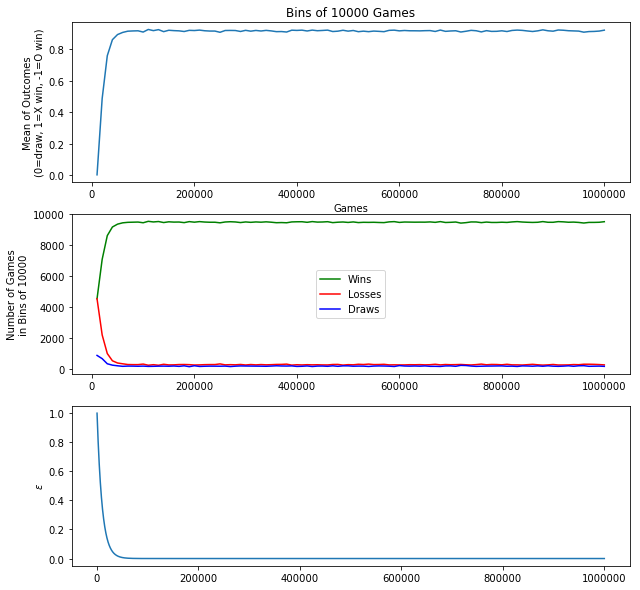

In [7]:
Q1 = rv.RLmethod(rv.startState(4), 1000000, .2, .9999)

In [8]:
len(Q1)

15512

#### Case II : 6x6

As we can see, I obtained a contrasting result for 6x6 board size as compared to the 4x4 board. Therefore, I computed once more for 6x6 board and even though the results are slightly better than the first time but way different from case I. I would like to point out that before getting these results, the winning rate for all board sizes was more than 90% and that was my expectation as well but there was the bug in the way the opponent was playing the game. After I fixed that bug, the winning rate suddenly dropped to around 50%. I will discuss this strange behavior in the results. 

Outcomes: 411839 X wins 532062 O wins 56099 draws


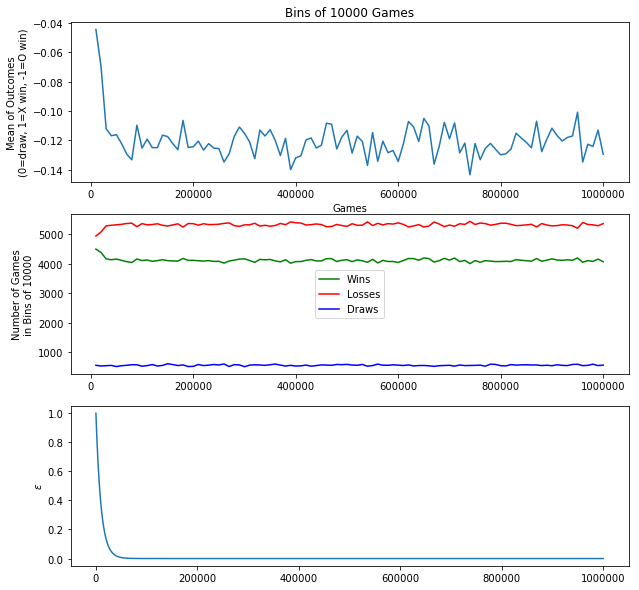

In [10]:
Q2 = rv.RLmethod(rv.startState(6), 1000000, .2, .9999)

In [ ]:
len(Q2)

7391035

Outcomes: 549737 X wins 397016 O wins 53247 draws


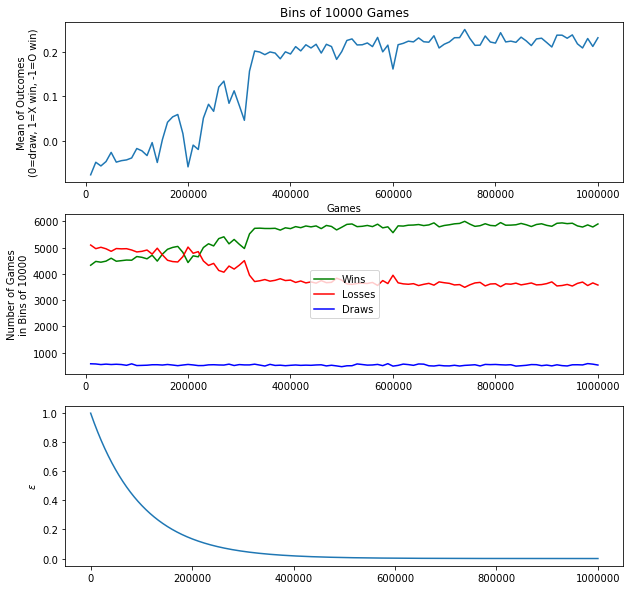

In [2]:
Q3 = rv.RLmethod(rv.startState(6), 1000000, .2, .99999)

In [ ]:
len(Q3)

8630338

#### Case III : 8x8

Let me bring this to your attention that for the 8x8 board it stopped after 800000 iterations because it ran out of memory and my system crashed. Therefore I do not have the size of Q4 but I expect it would of the order of 10<sup>7</sup>.

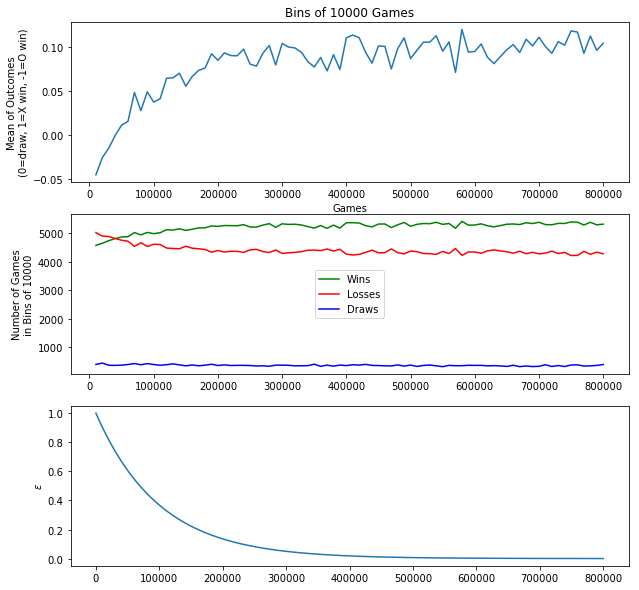

In [ ]:
Q4 = rv.RLmethod(rv.startState(8), 1000000, .2, .99999)

In [ ]:
len(Q4)

The block below shows all steps for 100 games played from start to end.

In [ ]:
Q5 = rv.RLmethod(rv.startState(8), 100, .2, .91,False,True)

|
|X|O|O| | |X| | |
|X|O|X|X|X| | | |
| |O|O|O|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O| | |
| | | | | |O| | |
| | | | | | | | |

|X|X|X| | | | | |
|X|X|X| | |X| | |
|X|O|X|X|X| | | |
| |O|O|O|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O| | |
| | | | | |O| | |
| | | | | | | | |

|X|X|X| | | | | |
|X|X|X| |O|X| | |
|X|O|X|O|O| | | |
| |O|O|O|O|O| | |
| | |O|O|O|O|O| |
| | | | |O|O| | |
| | | | | |O| | |
| | | | | | | | |

|X|X|X| | | | | |
|X|X|X| |O|X| | |
|X|X|X|O|O| | | |
| |O|X|O|O|O| | |
| | |O|X|O|O|O| |
| | | | |X|O| | |
| | | | | |X| | |
| | | | | | |X| |

|X|X|X| | | | | |
|X|X|X| |O|X| | |
|X|X|X|O|O| | | |
| |O|X|O|O|O| | |
| | |O|X|O|O|O| |
| | | | |O|O| | |
| | | | |O|X| | |
| | | | | | |X| |

|X|X|X| | | | | |
|X|X|X| |O|X| | |
|X|X|X|X|O| | | |
| |O|X|O|X|O| | |
| | |O|X|O|X|O| |
| | | | |O|O|X| |
| | | | |O|X| | |
| | | | | | |X| |

|X|X|X| | | |O| |
|X|X|X| |O|O| | |
|X|X|X|X|O| | | |
| |O|X|O|X|O| | |
| | |O|X|O|X|O| |
| | | | |O|O|X| |
| | | | |O|X| | |
| | | | | | |X| |

|

| | |X| |O| | | |
| | |X|X|O|X|O| |
| | |X|X|O|O|X| |
| | | |X|X|O| | |
| | | |X|X|O| | |
| | | |X| |O| | |
| | | | | | | | |

| | | | |O| | | |
| | |X| |O| | | |
| | |X|X|O|X|O| |
| | |X|O|O|O|X| |
| | |O|O|O|O| | |
| | | |X|X|O| | |
| | | |X| |O| | |
| | | | | | | | |

| | | | |O| | | |
| | |X| |O| | | |
| | |X|X|O|X|O| |
| | |X|X|O|O|X| |
| | |O|O|X|O| | |
| | | |X|X|X| | |
| | | |X| |O|X| |
| | | | | | | | |

| | | | |O| | | |
| | |X| |O|O| | |
| | |X|X|O|O|O| |
| | |X|X|O|O|X| |
| | |O|O|X|O| | |
| | | |X|X|X| | |
| | | |X| |O|X| |
| | | | | | | | |

| | | | |O| | | |
| | |X| |O|O| | |
| | |X|X|X|X|X|X|
| | |X|X|O|O|X| |
| | |O|O|X|O| | |
| | | |X|X|X| | |
| | | |X| |O|X| |
| | | | | | | | |

| | | | |O| | | |
| | |X| |O|O| | |
| | |X|O|X|X|X|X|
| | |O|X|O|O|X| |
| |O|O|O|X|O| | |
| | | |X|X|X| | |
| | | |X| |O|X| |
| | | | | | | | |

| | | | |O| |X| |
| | |X| |O|X| | |
| | |X|O|X|X|X|X|
| | |O|X|O|O|X| |
| |O|O|O|X|O| | |
| | | |X|X|X| | |
| | | |X| |O|X| |
| | | | | | | | |

| |

| | | | |X|O|O| |
| | | | | | | | |

| | | | | | | | |
| | | |X|X|X| | |
| | | | |X| |X| |
| | |X|X|X|X|X|X|
| | | |X|X| |X| |
| | |O| |X|X| | |
| | | | |X|X|O| |
| | | | | | |X| |

| | | | | | | | |
| | | |X|X|X| | |
| | | | |X|O|X| |
| | |X|X|O|X|X|X|
| | | |O|X| |X| |
| | |O| |X|X| | |
| | | | |X|X|O| |
| | | | | | |X| |

| | | | | | | | |
| | | |X|X|X| | |
| | | | |X|O|X| |
| | |X|X|O|X|X|X|
| | |X|X|X| |X| |
| | |O| |X|X| | |
| | | | |X|X|O| |
| | | | | | |X| |

| | | | |O| | | |
| | | |X|O|X| | |
| | | | |O|O|X| |
| | |X|X|O|X|X|X|
| | |X|X|X| |X| |
| | |O| |X|X| | |
| | | | |X|X|O| |
| | | | | | |X| |

| | | | |O| | | |
| | | |X|O|X| | |
| | | |X|X|X|X| |
| | |X|X|O|X|X|X|
| | |X|X|X| |X| |
| | |O| |X|X| | |
| | | | |X|X|O| |
| | | | | | |X| |

| | | | |O| | | |
| | | |X|O|X| | |
| | | |X|X|X|X| |
| | |X|X|O|X|X|X|
| | |X|X|X| |X| |
| | |O| |X|X| | |
| | | |O|O|O|O| |
| | | | | | |X| |

| | | |X|O| | | |
| | | |X|X|X| | |
| | | |X|X|X|X| |
| | |X|X|O|X|X|X|
| | |X|X|X| |X| |
| |

| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|X|O|O|O| | |
| |X| |X|O|O| | |
| | | | |X|X|O| |
| | | | | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|X|X|X|X|X| |
| |X| |X|O|X| | |
| | | | |X|X|O| |
| | | | | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|O|X|X|X|X| |
| |O| |X|O|X| | |
|O| | | |X|X|O| |
| | | | | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|O|X|X|X|X| |
| |X| |X|O|X| | |
|O|X| | |X|X|O| |
| | | | | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|O|O|X|X|X| |
| |X| |O|O|X| | |
|O|X| |O|O|O|O| |
| | | | | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|O|O|X|X|X| |
| |X| |O|X|X| | |
|O|X| |X|O|O|O| |
| | |X| | |X|X| |
| | | | | | | | |

| | | | | | | | |
| |X| | | | | | |
| |X| |O|O| |O| |
|O|X|O|O|X|X|X| |
| |X| |O|X|X| | |
|O|X| |X|O|O|O| |
| |

| | |X|X|O| | | |
| |X| |X|X|X| |O|
| | | |X|O|X|X| |
| | | |O|O|O|X|X|
| |X|X|X|X|X| |X|
| | | | | | | | |
| | | | | | | | |

| | | |X|O| | | |
| | |X|X|O| | | |
| |X| |X|X|X| |O|
| | | |X|O|X|X| |
| | | |O|O|O|X|X|
| |X|X|X|X|O| |X|
| | | | | | |O| |
| | | | | | | | |

| | | |X|X|X| | |
| | |X|X|X| | | |
| |X| |X|X|X| |O|
| | | |X|O|X|X| |
| | | |O|O|O|X|X|
| |X|X|X|X|O| |X|
| | | | | | |O| |
| | | | | | | | |

| | | |X|X|X| | |
| | |X|X|X| | | |
| |X| |X|X|X| |O|
| | | |X|O|X|X| |
| | | |O|O|O|X|X|
| |X|X|X|O|O| |X|
| | | | |O| |O| |
| | | | | | | | |

| | | |X|X|X| | |
| | |X|X|X| | | |
| |X| |X|X|X| |O|
| | | |X|X|X|X| |
| | | |O|O|X|X|X|
| |X|X|X|X|X|X|X|
| | | | |O| |O| |
| | | | | | | | |

| | | |X|X|X| | |
| | |X|X|X| |O| |
| |X| |X|X|O| |O|
| | | |X|O|X|X| |
| | | |O|O|X|X|X|
| |X|X|X|X|X|X|X|
| | | | |O| |O| |
| | | | | | | | |

| | | |X|X|X| | |
| | |X|X|X| |O| |
| |X| |X|X|X|X|O|
| | | |X|O|X|X| |
| | | |O|O|X|X|X|
| |X|X|X|X|X|X|X|
| | | | |O| |O| |
| | | | | | | | |

| |

| | |O|X|X|X| | |
| |O| |O|X|X| | |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
| |O|X| |X|O| | |
| | |O|X|X|X|O| |
| | |X|O|X|O| | |
| | |O|X|X|X| | |
| |O| |O|X|X| | |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|X|X| |X|O| | |
| | |O|X|X|X|O| |
| | |X|O|X|O| | |
| | |O|X|X|X| | |
| |O| |O|X|X| | |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|X|X| |O|O| | |
| | |O|X|X|O|O| |
| | |X|O|X|O|O| |
| | |O|X|X|X| | |
| |O| |O|X|X| | |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|X|X| |O|O| | |
| |X|X|X|X|O|O| |
| | |X|O|X|O|O| |
| | |O|X|X|X| | |
| |O| |O|X|X| | |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|X|O| |O|O| | |
| |X|X|O|X|O|O| |
| | |X|O|O|O|O| |
| | |O|X|X|O| | |
| |O| |O|O|O|O| |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|X|X|X|O|O| | |
| |X|X|X|X|O|O| |
| | |X|X|O|O|O| |
| | |O|X|X|O| | |
| |O| |O|O|O|O| |
| | | |X| |X|X| |
| | |X|X|X| | | |

| |O|O|O| | | | |
|X|O|X|X|O|O| | |
| |O|X|X|X|O|O| |
| |

| |X|X|X|X| | | |
| |O|X|X| |X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O|O| | |
|X|X|X|X|O|O|O| |
| |X|X|X|O| | | |
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O|O| | |
|X|X|X|X|X|X|X|X|
| |X|X|X|O| | | |
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O|O| | |
|X|X|X|X|X|X|O|X|
| |X|X|X|O| | |O|
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | | | | | | | |
| | |X| | |X| | |
| |X|X| |X|X| | |
|X|X|X|X|X|X|O|X|
| |X|X|X|O| | |O|
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | |O| | | | | |
| | |O| | |X| | |
| |X|O| |X|X| | |
|X|X|O|X|X|X|O|X|
| |X|O|X|O| | |O|
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | |O| | | | | |
| | |O| | |X| | |
| |X|X|X|X|X| | |
|X|X|X|X|X|X|O|X|
| |X|O|X|O| | |O|
| |O|O|O|O|X| | |
|O|X|X|X| | | | |
| |X|X|X| | | | |

| | |O| | | | | |
|O| |O| | |X| | |
| |O|X|X|X|X| | |
|X|

|X|X|O|X|X|X|O| |
| |O|X|X|X|X| | |
|O|X|X| |O| |X| |
| | |X| | |O| | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X|X|X|X|X|X| | |
|X|X|O|X|X|X|O| |
| |O|X|X|X|X| | |
|O|O|X| |O| |X| |
| |O|X| | |O| | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X|X|X|X|X|X| | |
|X|X|O|X|X|X|O| |
| |O|X|X|X|X| | |
|O|O|X| |X| |X| |
| |O|X| |X|O| | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X|X|X|X|X|X| | |
|X|X|O|X|X|X|O| |
| |O|X|X|X|X| |O|
|O|O|X| |X| |O| |
| |O|X| |X|O| | |

| | | | | | | | |
| | |X| | |X| | |
| |X|X| |X| | | |
|X|X|X|X|X|X| | |
|X|X|O|X|X|X|O| |
| |O|X|X|X|X| |O|
|O|O|X| |X| |O| |
| |O|X| |X|O| | |

| | | | | | | | |
| |O|X| | |X| | |
| |O|O| |X| | | |
|X|O|X|O|X|X| | |
|X|O|O|X|O|X|O| |
| |O|X|X|X|O| |O|
|O|O|X| |X| |O| |
| |O|X| |X|O| | |

| | | | | | | | |
|X|X|X| | |X| | |
| |X|O| |X| | | |
|X|O|X|O|X|X| | |
|X|O|O|X|O|X|O| |
| |O|X|X|X|O| |O|
|O|O|X| |X| |O| |
| |O|X| |X|O| | |

|O| | | | | | | |
|X|O|X| | |X| | |
| |X|O| |X| | | |
|X|

|X|X|X|X|X|X|O| |
| |X|O|X|X|O| | |
| |O|O|O|O|X|O| |
|O|X|O|O|X|X| | |
| | |O| | |X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|O| |
| |X|O|X|X|O| | |
|X|X|X|X|X|X|O| |
|O|X|O|O|X|X| | |
| | |O| | |X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|O| |
| |X|O|X|X|O| | |
|X|X|X|X|X|X|O| |
|O|X|O|O|X|O| | |
| | |O| |O|X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |X|O|X|X|O| |X|
|X|X|X|X|X|X|O| |
|O|X|O|O|X|O| | |
| | |O| |O|X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|O|X|X|X|X|X|X| |
|O|O|O|X|X|O| |X|
|O|O|X|X|X|X|O| |
|O|X|O|O|X|O| | |
| | |O| |O|X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|O|X|X|X|X|X|X| |
|O|O|O|X|X|X| |X|
|O|O|X|X|X|X|X| |
|O|X|O|O|X|O| |X|
| | |O| |O|X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|X| |X|X|X|X|O|
|O|O|O|O|O|O|O|O|
|O|O|O|X|X|X| |X|
|O|O|X|X|X|X|X| |
|O|X|O|O|X|O| |X|
| | |O| |O|X| | |
| | |O| | | |X| |
| | | | | | | |X|

|O|

|O|X|O|X|O|O| | |
|O|O|O|X|O|O|O|O|
|O|X|X| |X|X| |X|
| | | | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
| |X|O|O|O|O| | |
|O|X|O|X|O|O| | |
|O|O|O|X|O|O|O|O|
|O|X|X| |X|X| |X|
| | | | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
|O|O|O|O|O|O| | |
|O|O|O|X|O|O| | |
|O|O|O|X|O|O|O|O|
|O|X|X| |X|X| |X|
| | | | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
|O|O|O|O|O|X| | |
|O|O|O|X|X|X|X| |
|O|O|O|X|O|X|O|O|
|O|X|X| |X|X| |X|
| | | | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
|O|O|O|O|O|X| | |
|O|O|O|X|X|X|X| |
|O|O|O|X|O|X|O|O|
|O|O|X| |X|X| |X|
|O| | | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
|O|X|O|O|O|X| | |
|O|X|O|X|X|X|X| |
|O|X|O|X|O|X|O|O|
|O|X|X| |X|X| |X|
|O|X| | |X| | | |

| | | |X| |X| |O|
| | |X| |X|O|X|O|
| |X|O|O|X|X|X|X|
|O|X|O|O|O|X| | |
|O|X|O|X|O|X|X| |
|O|X|O|X|O|O|O|O|
|O|X|X| |X|X|O|X|
|O|X| | |X| | | |

| | | |X| |X|X|O|
| | |X| |X|X|X|O|
| |X|O|O|X|X|X|X|
|O|

| |X|O|O|O|O|X| |
|X|X|X|O|X|X|X| |
|O|X|X|X|O|X|O| |
|O|X|X|X|X|O| | |
|O|X|X|X|X|X|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | | |
|O|O|X|X| | |X|O|
| |X|O|O|O|O|O| |
|X|X|X|O|X|O|X| |
|O|X|X|X|O|X|O| |
|O|X|X|X|X|O| | |
|O|X|X|X|X|X|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | | |
|O|O|X|X| | |X|O|
| |X|O|O|X|O|O| |
|X|X|X|O|X|X|X| |
|O|X|X|X|O|X|X| |
|O|X|X|X|X|O| |X|
|O|X|X|X|X|X|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | | |
|O|O|X|X| | |X|O|
|O|O|O|O|X|O|O| |
|O|X|X|O|X|X|X| |
|O|X|X|X|O|X|X| |
|O|X|X|X|X|O| |X|
|O|X|X|X|X|X|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | | |
|O|O|X|X| | |X|O|
|O|O|O|O|X|X|X|X|
|O|X|X|O|X|X|X| |
|O|X|X|X|O|X|X| |
|O|X|X|X|X|O| |X|
|O|X|X|X|X|X|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | | |
|O|O|X|X| | |X|O|
|O|O|O|O|X|X|X|X|
|O|X|X|O|O|X|X| |
|O|X|X|X|O|O|X| |
|O|X|X|X|X|O|O|X|
|O|X|X|X|X|O|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | |X|
|O|O|X|X| | |X|X|
|O|O|O|O|X|X|X|X|
|O|X|X|O|O|X|X| |
|O|X|X|X|O|O|X| |
|O|X|X|X|X|O|O|X|
|O|X|X|X|X|O|O|O|
| | |X|O|O| |X| |

|O|O| |X|X| | |X|
|O|

|X|X|X|X|X|O|O|O|
|X|X|X|X|X|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|X|O| |O|X|O|
|X| |X|O| | | | |

|X| |O|O| | |O| |
|X|X|X|X|X|X|X|X|
|X|X|X|X|X|O|X|O|
|X|X|X|X|X|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|X|O| |O|X|O|
|X| |X|O| | | | |

|X|O|O|O| | |O| |
|X|X|O|X|X|X|X|X|
|X|X|X|O|X|O|X|O|
|X|X|X|X|O|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|X|O| |O|X|O|
|X| |X|O| | | | |

|X|X|X|X|X| |O| |
|X|X|O|X|X|X|X|X|
|X|X|X|O|X|O|X|O|
|X|X|X|X|O|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|X|O| |O|X|O|
|X| |X|O| | | | |

|X|X|X|X|X| |O| |
|X|X|O|X|X|X|X|X|
|X|X|X|O|X|O|X|O|
|X|X|X|X|O|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|O|O| |O|X|O|
|X|O|O|O| | | | |

|X|X|X|X|X| |O| |
|X|X|O|X|X|X|X|X|
|X|X|X|O|X|O|X|O|
|X|X|X|X|O|X|O|O|
|X|X|X|X|X|O|X|O|
| |X|X|O| |X| |O|
|X|X|O|O| |X|X|O|
|X|O|O|O| |X| | |

|X|X|X|X|X| |O| |
|X|X|O|X|X|X|X|X|
|X|X|X|O|X|O|X|O|
|X|X|X|X|O|X|O|O|
|X|X|X|X|O|O|X|O|
| |X|X|O|O|X| |O|
|X|X|O|O| |X|X|O|
|X|O|O|O| |X| | |

|X|X|X|X|X| |O| |
|X|

| |X| |X| |O| |X|
|O|X|X|X|X| |X| |
|O|X|X|X|X|X| |O|
|O|O|O|X|O|O|O|O|
|O|X|X|X|X|X| |O|
|O|X|O|X|X|O|O|O|
|X|X|O|X| | |O| |

|X|X|X|X|X| |O| |
| |X| |X| |O| |X|
|O|X|X|X|X| |X| |
|O|X|X|X|X|X| |O|
|O|O|O|X|O|O|O|O|
|O|O|O|O|O|O|O|O|
|O|X|O|X|X|O|O|O|
|X|X|O|X| | |O| |

|X|X|X|X|X| |O| |
| |X| |X| |O| |X|
|O|X|X|X|X| |X| |
|O|X|X|X|X|X| |O|
|O|O|O|X|X|O|O|O|
|O|O|O|O|O|X|O|O|
|O|X|O|X|X|O|X|O|
|X|X|O|X| | |O|X|

|X|X|X|X|X| |O| |
|O|X| |X| |O| |X|
|O|O|X|X|X| |X| |
|O|X|O|X|X|X| |O|
|O|O|O|O|X|O|O|O|
|O|O|O|O|O|X|O|O|
|O|X|O|X|X|O|X|O|
|X|X|O|X| | |O|X|

|X|X|X|X|X| |O| |
|O|X| |X| |O| |X|
|O|O|X|X|X| |X| |
|O|X|O|X|X|X| |O|
|O|O|O|O|X|O|O|O|
|O|O|O|O|O|X|O|O|
|O|X|O|X|X|X|X|O|
|X|X|O|X| |X|X|X|

|X|X|X|X|X| |O| |
|O|X| |X| |O| |X|
|O|O|X|X|X| |X| |
|O|X|O|O|O|O|O|O|
|O|O|O|O|X|O|O|O|
|O|O|O|O|O|X|O|O|
|O|X|O|X|X|X|X|O|
|X|X|O|X| |X|X|X|

|X|X|X|X|X| |O| |
|O|X| |X| |O| |X|
|O|O|X|X|X|X|X| |
|O|X|O|O|X|X|O|O|
|O|O|O|X|X|X|O|O|
|O|O|X|O|O|X|O|O|
|O|X|O|X|X|X|X|O|
|X|X|O|X| |X|X|X|

|X|

|X|X|X|X|O|O|X|X|
|X|O|X|X|X|O|O|X|
|X|X|O|X|X|O|O|X|
|X|X|X|X|X|O|X|X|
|O|O|O|O|O|O|O|X|
|O|O|O|O|O|O|O|O|

|X|X|X|X|X|X|X|X|
|X|X|X|X|X|O|X|X|
|X|X|X|X|O|O|X|X|
|X|O|X|X|X|O|O|X|
|X|X|O|X|X|O|O|X|
|X|X|X|X|X|O|X|X|
|O|O|O|O|O|O|O|X|
|O|O|O|O|O|O|O|O|

        X Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|O| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|X|X| | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|O|X|X| | |
| | |O|O|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | 

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| |O|X| | | | | |
| | |O| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |O| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |O| | | | | |
| |O|O|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |X| | | | | |
| |O|O|X|X| | | |
| |

| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |O|X|O|X| | | |
| | |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |X|X|O|X| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | |O| | | | | |
| | |O| | | | | |
| | |O| | | | | |
| |X|O|O|X| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | |O| | | | | |
| | |O| | | | | |
| | |O| | | | | |
| |X|O|O|X| | | |
|X| |X|O|O| | | |
| | | |X| | | | |
| | | | |X| | | |
| | | | | | | | |

| | |O| | | | | |
| | |O| | | | | |
| | |O| |O| | | |
| |X|O|O|O| | | |
|X| |X|O|O| | | |
| | | |X| | | | |
| | | | |X| | | |
| | | | | | | | |

| | |O| | | | | |
| | |O| | | | | |
| | |O| |O| | | |
| |X|X|X|X|X| | |
|X| |X|O|X| | | |
| | | |X| | | | |
| | | | |X| | | |
| | | | | | | | |

| | |O| | | | | |
| | |O| | | | | |
| | |O| |O| | | |
| |X|X|X|X|X| | |
|X| |X|O|X| | | |
| |

| |X|O|X|X| | | |
|X| |O| |X| | | |
| | |O| | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | |O| | | | |
| | |X|O|X| | | |
| |X|X|X|X| | | |
|X| |X| |X| | | |
| | |X| | | | | |
| | |X| | | | | |

| | | | | | | | |
| | | | | | | | |
| | | |O| | | | |
| | |X|O|X| | | |
| |X|X|O|X| | | |
|X| |X|O|X| | | |
| | |X| | | | | |
| | |X| | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | |X| | | | |
| | |X|O|X| | | |
| |X|X|O|X| | | |
|X| |X|O|X| | | |
| | |X| | | | | |
| | |X| | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | |X| | | | |
| | |X|O|X| | | |
| |X|X|O|X| | | |
|X| |X|O|X| | | |
| | |O| | | | | |
| |O|X| | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | |X| | | | |
| | |X|X|X| | | |
| |X|X|X|X| | | |
|X| |X|X|X| | | |
| | |O|X| | | | |
| |O|X| | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | |X| | | | |
| | |X|X|X| | | |
| |X|X|X|X| | | |
|X| |X|X|X| | | |
| | |O|X| | | | |
| |O|O|O| | | | |

| | | | | | | | |
| | | | |X| | | |
| | | |X| | | | |
| |

| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | | |X|X|X| | |
| | | |O|O|X|X| |
| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |X| | | | | |
| | |X|X|X| |O| |
| | | |X|X|O| | |
| | | |O|O|X|X| |
| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |X| | | | | |
| | |X|X|X| |O| |
| | | |X|X|O| | |
| | | |X|O|X|X| |
| | | |X| | | | |
| | | |X| | | | |

| | | | | | | | |
|X|X|X| | | | | |
| |O|X| | | | | |
| | |O|X|X| |O| |
| | | |O|X|O| | |
| | | |X|O|X|X| |
| | | |X| | | | |
| | | |X| | | | |

| | | | | | | | |
|X|X|X| | | | | |
| |X|X| | | | | |
| | |X|X|X| |O| |
| | | |X|X|O| | |
| | | |X|X|X|X| |
| | | |X| |X| | |
| | | |X| | | | |

| | | | | | | | |
|X|X|X| | | | | |
| |X|X| | | | | |
| | |X|X|X| |O| |
| | | |X|X|O| | |
| | | |X|X|O|X| |
| | | |X| |O| | |
| | | |X| |O| | |

| | | | | | | | |
|X|X|X| | | | | |
| |X|X| | | | | |
| | |X|X|X| |O| |
| | | |X|X|X|X| |
| |

| |X|X|X|X|X| | |
| | |O|O|X| | | |
| | |O| |O|X| | |
| | |O| |X|O| | |
| | | | | | | | |

| | |O| |O| |O| |
|X|X|O|X|X|O| | |
| |O|X| |X| | | |
| |X|O|X|X|X| | |
| | |O|O|X| | | |
| | |O| |O|X| | |
| | |O| |X|O| | |
| | | | | | | | |

| | |O| |O| |O| |
|X|X|O|X|X|O| | |
| |X|X| |X| | | |
| |X|X|X|X|X| | |
| | |O|X|X| | | |
| | |O| |X|X| | |
| | |O| |X|X| | |
| | | | | | |X| |

| | |O| |O| |O| |
|X|X|O|X|X|O| | |
| |X|X| |X|O| | |
| |X|X|X|O|X| | |
| | |O|O|X| | | |
| | |O| |X|X| | |
| | |O| |X|X| | |
| | | | | | |X| |

| | |O| |O| |O| |
|X|X|O|X|X|X|X| |
| |X|X| |X|O| | |
| |X|X|X|O|X| | |
| | |O|O|X| | | |
| | |O| |X|X| | |
| | |O| |X|X| | |
| | | | | | |X| |

| | |O| |O| |O| |
|X|X|O|X|X|X|X| |
| |O|X| |X|O| | |
|O|O|O|O|O|X| | |
| | |O|O|X| | | |
| | |O| |X|X| | |
| | |O| |X|X| | |
| | | | | | |X| |

| | |O| |O| |O| |
|X|X|O|X|X|X|X| |
| |X|X| |X|O| | |
|O|X|O|O|O|X| | |
| |X|X|X|X| | | |
| | |O| |X|X| | |
| | |O| |X|X| | |
| | | | | | |X| |

| | |O| |O| |O| |
|X|X|O|O|X|X|X| |
| |

|X| |X|X|O| |X| |
| | |X|X|O|O| |X|
| | |X|X|O| | | |
| | |X| | | | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| | |X|X|O| | | |
|O|O|X|X|O|X|X| |
|X| |X|X|O| |X| |
| | |X|X|O|O| |X|
| | |X|X|O| | | |
| | |X| | | | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |O|O|O|O| | | |
|O|O|O|X|O|X|X| |
|X| |X|O|O| |X| |
| | |X|X|O|O| |X|
| | |X|X|O| | | |
| | |X| | | | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |X|O|X|O| | | |
|O|X|X|X|O|X|X| |
|X|X|X|O|O| |X| |
| | |X|X|O|O| |X|
| | |X|X|O| | | |
| | |X| | | | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |X|O|X|O| | | |
|O|X|X|X|O|X|X| |
|X|O|X|O|O| |X| |
| | |O|X|O|O| |X|
| | |X|O|O| | | |
| | |X| |O| | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |X|O|X|O| | | |
|O|X|X|X|O|X|X| |
|X|O|X|O|O| |X| |
| | |O|X|O|X| |X|
| | |X|X|X| | | |
| | |X|X|O| | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |X|O|X|O| | | |
|O|X|X|X|O|O|O|O|
|X|O|X|O|O| |X| |
| | |O|X|O|X| |X|
| | |X|X|X| | | |
| | |X|X|O| | | |

| | |O| | | | | |
| |X|X|X|X| | | |
| |X|O|X|X|X| | |
|O|

| | |O| |O| | | |
| | |O|X|X| | | |
|O|O|O|X|X| | | |
|O|O|X| |X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| | | | | |
|X|X|X|X| | | | |
| | |O| |O| | | |
| | |O|X|X| | | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |O| | | |
| |X|X|X|X| | | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| |O| | | |
|X|X|X|O| | | | |
| | |O| |O| | | |
| |O|X|X|X| | | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| |O| | | |
|X|X|X|X|X| | | |
| | |O| |X| | | |
| |O|X|X|X| | | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| |O| | | |
|X|X|X|X|X|O| | |
| | |O| |O| | | |
| |O|X|O|X| | | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| |O| | | |
|X|X|X|X|X|O| | |
| | |O| |X| | | |
| |O|X|O|X|X| | |
|O|O|O|X|X| | | |
|O|O|O|O|X|X| | |
|O| |X|O| | |X| |
| | | | | | | |X|

| | |O| |O| | | |
|X|

|X|X|O|X| | | | |
|X|X|X|X|X|O| | |
| |X|O|O|X|O| | |
|O|O|O|O|X|O| | |
| |X| | | |O| | |
| | | | | |O|X| |

| |X|X|X| | | | |
|X|X|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|O| | |
| |X|O|O|X|O| | |
|O|O|O|O|X|O| | |
| |X| | | |O| | |
| | | | | |O|O|O|

| |X|X|X| | | | |
|X|X|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|O| | |
| |X|X|O|X|O| | |
|O|O|O|X|X|O| | |
| |X| | |X|O| | |
| | | | | |O|O|O|

| |X|X|X| | | | |
|X|X|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|O| | |
| |X|X|O|X|O| | |
|O|O|O|X|X|O| | |
| |O| | |X|O| | |
|O| | | | |O|O|O|

| |X|X|X| | | | |
|X|X|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|X|X| |
| |X|X|O|X|X| | |
|O|O|O|X|X|O| | |
| |O| | |X|O| | |
|O| | | | |O|O|O|

|O|X|X|X| | | | |
|X|O|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|X|X| |
| |X|X|O|X|X| | |
|O|O|O|X|X|O| | |
| |O| | |X|O| | |
|O| | | | |O|O|O|

|O|X|X|X| | | | |
|X|O|X|X|X| | | |
|X|X|O|X| | | | |
|X|X|X|X|X|X|X| |
| |X|X|O|X|X| | |
|O|X|O|X|X|O| | |
| |X| | |X|O| | |
|O|X| | | |O|O|O|

|O|X|X|X| | | | |
|X|

| | | | | | | | |
| | |X|X|X| | | |
|O|X|X|X|X|X|X|X|
|X|X|X|O|X|X|X|X|
| |X|O|O|X|X|X| |
|X|X|O|O|O|X| | |
|X|O| |O|O| |X| |
|O| | | | | | | |

| | | | | | | | |
| | |X|X|X| | | |
|O|X|X|X|X|X|X|X|
|X|X|X|O|X|X|X|X|
| |X|O|O|X|X|X| |
|X|X|O|O|O|O|O| |
|X|O| |O|O| |X| |
|O| | | | | | | |

| | | | | | | | |
| | |X|X|X| | | |
|O|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|
| |X|O|X|X|X|X| |
|X|X|O|X|O|X|O| |
|X|O| |X|X| |X| |
|O| | |X| | | | |

| |O| | | | | | |
| | |O|X|X| | | |
|O|X|X|O|X|X|X|X|
|X|X|X|X|O|X|X|X|
| |X|O|X|X|O|X| |
|X|X|O|X|O|X|O| |
|X|O| |X|X| |X| |
|O| | |X| | | | |

| |O| | | | | | |
| |X|X|X|X| | | |
|O|X|X|O|X|X|X|X|
|X|X|X|X|O|X|X|X|
| |X|O|X|X|O|X| |
|X|X|O|X|O|X|O| |
|X|O| |X|X| |X| |
|O| | |X| | | | |

| |O| | | | | | |
| |X|X|X|X| |O| |
|O|X|X|O|X|O|O|X|
|X|X|X|X|O|X|O|X|
| |X|O|X|X|O|O| |
|X|X|O|X|O|X|O| |
|X|O| |X|X| |X| |
|O| | |X| | | | |

| |O| | | | | | |
| |X|X|X|X| |O| |
|O|X|X|X|X|O|O|X|
|X|X|X|X|X|X|O|X|
| |X|O|X|X|X|O| |
|X|X|O|X|O|X|X| |
|X|O| |X|X| |X|X|
|O| 

|O| | |X|X|O|O| |
|X|O|X|X|O|O|O|X|
| |X|O|O|X|X|X|X|
| |X|O|O|O|X|O|X|
| |O|O|X|X|O|X| |
| |O| |X|O| | |X|

|O|O|O|O|O| |O| |
| |O|X|X|O|O|O|O|
|O| | |X|X|O|O| |
|X|O|X|X|O|O|O|X|
| |X|O|O|X|X|X|X|
| |X|O|O|O|X|O|X|
| |O|O|X|X|O|X| |
| |O| |X|O| | |X|

|O|O|O|O|O| |O| |
|X|X|X|X|O|O|O|O|
|X| | |X|X|O|O| |
|X|O|X|X|O|O|O|X|
| |X|O|O|X|X|X|X|
| |X|O|O|O|X|O|X|
| |O|O|X|X|O|X| |
| |O| |X|O| | |X|

|O|O|O|O|O| |O| |
|X|X|X|X|O|O|O|O|
|X| | |X|X|O|O| |
|X|O|X|X|O|O|O|X|
| |X|O|O|X|X|X|X|
| |X|O|O|O|X|O|X|
| |O|O|X|X|O|O| |
| |O| |X|O| |O|X|

|O|O|O|O|O|X|O| |
|X|X|X|X|X|X|O|O|
|X| | |X|X|X|O| |
|X|O|X|X|O|X|O|X|
| |X|O|O|X|X|X|X|
| |X|O|O|O|X|O|X|
| |O|O|X|X|O|O| |
| |O| |X|O| |O|X|

|O|O|O|O|O|X|O| |
|X|X|X|X|X|X|O|O|
|X| | |X|X|X|O| |
|X|O|X|X|O|X|O|X|
| |X|O|O|X|X|X|X|
|O|O|O|O|O|X|O|X|
| |O|O|X|X|O|O| |
| |O| |X|O| |O|X|

|O|O|O|O|O|X|X|X|
|X|X|X|X|X|X|X|O|
|X| | |X|X|X|O| |
|X|O|X|X|O|X|O|X|
| |X|O|O|X|X|X|X|
|O|O|O|O|O|X|O|X|
| |O|O|X|X|O|O| |
| |O| |X|O| |O|X|

|O|O|O|O|O|X|X|X|
|X|

|X|X|X|X|X|X|X|X|
|X|X|X|X|O|X|O|X|
|X|X|X|O|X|O|X|X|
|X|X|O|O|O|O|X|X|
|X|X|X|O|O|O|O|X|
|O|X|X|O|O|X|X|X|
| | |O|O|O|O| |X|

| |X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|
|X|X|X|X|O|X|O|X|
|X|X|X|O|X|O|X|X|
|X|X|O|O|O|O|X|X|
|X|X|X|O|O|O|O|X|
|X|X|X|O|O|X|X|X|
|X| |O|O|O|O| |X|

|O|X|X|X|X|X|X|X|
|X|O|X|X|X|X|X|X|
|X|X|O|X|O|X|O|X|
|X|X|X|O|X|O|X|X|
|X|X|O|O|O|O|X|X|
|X|X|X|O|O|O|O|X|
|X|X|X|O|O|X|X|X|
|X| |O|O|O|O| |X|

|O|X|X|X|X|X|X|X|
|X|O|X|X|X|X|X|X|
|X|X|O|X|O|X|O|X|
|X|X|X|O|X|O|X|X|
|X|X|O|O|O|O|X|X|
|X|X|X|O|O|O|O|X|
|X|X|X|O|O|X|X|X|
|X| |O|O|O|O| |X|

|O|X|X|X|X|X|X|X|
|X|O|X|X|X|X|X|X|
|X|O|O|X|O|X|O|X|
|X|O|X|O|X|O|X|X|
|X|O|O|O|O|O|X|X|
|X|O|X|O|O|O|O|X|
|X|O|O|O|O|X|X|X|
|X|O|O|O|O|O| |X|

|O|X|X|X|X|X|X|X|
|X|O|X|X|X|X|X|X|
|X|O|O|X|O|X|O|X|
|X|O|X|O|X|O|X|X|
|X|O|O|O|O|O|X|X|
|X|O|X|O|O|O|O|X|
|X|O|O|O|O|X|X|X|
|X|X|X|X|X|X|X|X|

        X Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | |X|X|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | |X|O|O| | | |
| | |X|O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|O|X| | | |
| | |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|O|O|O| | |
| | |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|X|X|O| | |
| | |X|X|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|X|X|O| | |
| | |X|X|O|X| | |
| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|X|X|X| | |
| | |X|X|O|X|X| |
| | | |O| | | | |
| | 

| | |O| | | | | |
|X|X|X|X| | | | |
| | |O| |X| |O| |
| | |X|O|X|X|X| |
| | | |X|O| | | |
| | | |O|O|X| | |
| | | | |O|X| | |
| | | | | | | | |

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |X| |O| |
| |X|X|O|X|X|X| |
| | | |X|O| | | |
| | | |O|O|X| | |
| | | | |O|X| | |
| | | | | | | | |

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |X| |O| |
| |X|X|O|X|X|X| |
| | | |X|O| | | |
| | | |O|O|X| | |
| | | | |O|O| | |
| | | | | | |O| |

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |X| |O| |
| |X|X|X|X|X|X| |
| | |X|X|O| | | |
| | | |O|O|X| | |
| | | | |O|O| | |
| | | | | | |O| |

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |X| |O| |
| |X|X|X|X|X|X| |
| | |X|X|O| | | |
| | | |O|O|O| | |
| | | | |O|O|O| |
| | | | | | |O| |

| | |O| | | | | |
|X|X|X|X| | | | |
| | |X| |X| |O| |
| |X|X|X|X|X|X| |
| | |X|X|X| | | |
| | | |O|O|X| | |
| | | | |O|O|X| |
| | | | | | |O|X|

| | |O| | | | | |
|X|X|X|X|O| | | |
| | |X| |O| |O| |
| |X|X|X|O|X|X| |
| | |X|X|O| | | |
| | | |O|O|X| | |
| | | | |O|O|X| |
| | 

| | |X| |O| | | |
| | | | |O| | | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|X|X|O|O|X|X|
|O| |X|X|O| |O| |
| | | |X|O|X| | |
| | |X| |O| | | |
| | | | |O| | | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|X|X|O|O|X|X|
|X| |X|X|O| |O| |
|X| | |X|O|X| | |
| | |X| |O| | | |
| | | | |O| | | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|O|X|O|O|X|X|
|X| |O|O|O| |O| |
|X| |O|O|O|X| | |
| | |X| |O| | | |
| | | | |O| | | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|O|X|O|O|X|X|
|X| |X|O|O| |O| |
|X| |O|X|O|X| | |
| | |X| |X| | | |
| | | | |O|X| | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|O|X|O|O|X|X|
|X| |X|O|O| |O| |
|X| |O|X|O|O|O| |
| | |X| |X| | | |
| | | | |O|X| | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|O|X|O|O|X|X|
|X| |X|O|X| |X| |
|X| |O|X|O|X|X| |
| | |X| |X| |X| |
| | | | |O|X| | |

|O| |O| |O| | | |
|O|O|O|O|O|O|O| |
|O| |O| |O| | | |
|X|X|O|O|O|O|X|X|
|X| |O|O|X| |X| |
|X|

|O|O|O|O|O|X| | |
| | | | |X|X|X| |
| | | | | |X| |X|

| |X|X|X| | | | |
| | |X| |X|X|X| |
|O|X|X|X|O|X| | |
|O|O|X|O|X|X| | |
|O|O|O|O|X|X|X| |
|O|O|O|O|O|X| | |
| | | | |X|X|X| |
| | | | | |X| |X|

| |X|X|X| | | | |
| | |X| |X|X|X| |
|O|X|X|X|O|O|O| |
|O|O|X|O|X|O| | |
|O|O|O|O|O|X|X| |
|O|O|O|O|O|X| | |
| | | | |X|X|X| |
| | | | | |X| |X|

| |X|X|X| | | | |
| | |X| |X|X|X| |
|O|X|X|X|O|X|X| |
|O|O|X|O|X|X|X| |
|O|O|O|O|O|X|X| |
|O|O|O|O|O|X| | |
| | | | |X|X|X| |
| | | | | |X| |X|

| |X|X|X| | | | |
| |O|X| |X|X|X| |
|O|O|O|X|O|X|X| |
|O|O|X|O|X|X|X| |
|O|O|O|O|O|X|X| |
|O|O|O|O|O|X| | |
| | | | |X|X|X| |
| | | | | |X| |X|

| |X|X|X| | | | |
| |X|X| |X|X|X| |
|O|X|O|X|O|X|X| |
|O|X|X|O|X|X|X| |
|O|X|O|X|O|X|X| |
|O|X|X|O|O|X| | |
| |X| | |X|X|X| |
| | | | | |X| |X|

| |X|X|X|O| | | |
| |X|X| |O|X|X| |
|O|X|O|X|O|X|X| |
|O|X|X|O|X|X|X| |
|O|X|O|X|O|X|X| |
|O|X|X|O|O|X| | |
| |X| | |X|X|X| |
| | | | | |X| |X|

| |X|X|X|X|X| | |
| |X|X| |X|X|X| |
|O|X|O|X|O|X|X| |
|O|X|X|O|X|X|X| |
|O|

|O|X|O|X|X|O|X|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | | | |O| |
|O|X|X| | | |O| |
|O|O|X|X| | |O|O|
|O|X|X|X|X|O|O|O|
|O|X|O|X|X|X|X|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | | | |O| |
|O|X|X| |O| |O| |
|O|O|X|O| | |O|O|
|O|X|O|X|X|O|O|O|
|O|O|O|X|X|X|X|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | | | |O| |
|O|X|X| |O| |O| |
|O|O|X|X|X| |O|O|
|O|X|O|X|X|X|O|O|
|O|O|O|X|X|X|X|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | | | |O| |
|O|O|O|O|O| |O| |
|O|O|O|O|O| |O|O|
|O|O|O|O|X|O|O|O|
|O|O|O|O|X|X|O|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | |X| |O| |
|O|O|O|O|X| |O| |
|O|O|O|O|X| |O|O|
|O|O|O|O|X|O|O|O|
|O|O|O|O|X|X|O|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

| | | | |X| |O| |
|O|O|O|O|X| |O| |
|O|O|O|O|O|O|O|O|
|O|O|O|O|O|O|O|O|
|O|O|O|O|X|X|O|O|
|O|X|X|O|O|X|X|O|
|O| |O|X|O|O|X|X|
| |O|O|O|O|O|O|X|

|X| | | |X| |O| |
|O|X|O|O|X| |O| |
|O|O|X|O|O|O|O|O|
|O|

| |O|X|X|O|O|X|X|
|O| |X|O|X|O|X| |
| |O|O|X|X|O|O|X|
|X|X|O|X|X|O|O|O|
|O| |X|O| |X|X| |

|O|X| |X|X|X|X| |
|X|X|X|X|X|X|X| |
| |X|O|X|X|O|X| |
| |X|X|X|O|O|X|X|
|O|X|X|O|X|O|X| |
| |X|X|X|X|O|O|X|
|X|X|O|X|X|O|O|O|
|O| |X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|O| |
| |X|O|X|X|O|X| |
| |X|X|X|O|O|X|X|
|O|X|X|O|X|O|X| |
| |X|X|X|X|O|O|X|
|X|X|O|X|X|O|O|O|
|O| |X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |X|O|X|X|O|X|X|
| |X|X|X|O|O|X|X|
|O|X|X|O|X|O|X| |
| |X|X|X|X|O|O|X|
|X|X|O|X|X|O|O|O|
|O| |X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |X|O|X|X|O|X|X|
| |X|X|X|O|O|X|X|
|O|X|X|O|X|O|X| |
|O|O|O|O|O|O|O|X|
|O|X|O|X|X|O|O|O|
|O| |X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |X|O|X|X|O|X|X|
| |X|X|X|O|O|X|X|
|O|X|X|O|X|O|X| |
|O|O|O|X|O|O|O|X|
|O|X|X|X|X|O|O|O|
|O|X|X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |X|O|X|X|O|X|X|
| |X|X|X|O|O|O|X|
|O|X|X|O|X|O|O|O|
|O|O|O|X|O|O|O|O|
|O|X|X|X|X|O|O|O|
|O|X|X|O| |X|X| |

|O|X| |X|X|X|X|O|
|X|X|X|X|X|X|X| |
| |

| |X|X|X|O|O|O|O|
|X|X|X|X|O|O|O|O|
| | |X|O|X|O|O|O|
| | |X|O|O|O|O|O|
|O|O|O|O|O|O|O|O|
|X| |X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|O|X|X|X|X|
| |X|X|X|O|O|O|O|
|X|X|X|X|O|O|O|O|
| | |X|O|X|O|O|O|
| | |X|X|O|O|O|O|
|O|O|X|O|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|O|X|X|X|X|
| |X|X|X|O|O|O|O|
|X|X|X|O|O|O|O|O|
| | |O|O|X|O|O|O|
| |O|O|O|O|O|O|O|
|O|O|X|O|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|O|X|X|X|X|
| |X|X|X|O|O|O|O|
|X|X|X|O|O|O|O|O|
| |X|X|X|X|O|O|O|
| |X|X|O|O|O|O|O|
|O|X|X|X|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|O|X|X|X|X|
|O|O|O|O|O|O|O|O|
|X|O|X|O|O|O|O|O|
| |X|O|X|X|O|O|O|
| |X|X|O|O|O|O|O|
|O|X|X|X|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|X|X|X|X|X|
|O|O|X|O|O|O|O|O|
|X|X|X|O|O|O|O|O|
|X|X|O|X|X|O|O|O|
| |X|X|O|O|O|O|O|
|O|X|X|X|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O| |X|X|X|X|X|X|
|O|O|X|O|O|O|O|O|
|O|X|O|O|O|O|O|O|
|O|O|O|X|X|O|O|O|
|O|O|O|O|O|O|O|O|
|O|X|X|X|O|O|O|O|
|X|X|X|X|X|X|X|X|

| |X|X|X|X|X|X|X|
|O|

| | | | | | | | |
| | | | | | | | |
| | |O| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|O|O| | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|O|O| | |
| | | |X|X| | | |
| | | | | |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|O|O| | |
| | | |X|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X|X|X| |
| | | |X|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X|X|X| |
| | | |X|O| | | |
| | | |O| |O| | |
| | | | | | |O| |
| | 

| | |X| | | | | |
| | |X|X|X| | | |
| | | |X|X|X| | |
| | | |O|X|X|X| |
| | | | | |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |O|X| | | | | |
| | |O|X|X| | | |
| | | |O|X|X| | |
| | | |O|O|X|X| |
| | | | | |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| | | | | |
|X| |O|X|X| | | |
| | | |O|X|X| | |
| | | |O|O|X|X| |
| | | | | |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X| |O|X|O| | | |
| | | |O|O|X| | |
| | | |O|O|X|X| |
| | | | | |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X| |X|X|O| | | |
| | | |X|O|X| | |
| | | |O|X|X|X| |
| | | | | |X| | |
| | | | | | |X| |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X| |X|X|O| | | |
| | | |O|O|X| | |
| | |O|O|X|X|X| |
| | | | | |X| | |
| | | | | | |X| |

| | | | | | | | |
| | |X| | | | | |
| |X|X| |O| | | |
|X| |X|X|X|X| | |
| | | |O|O|X| | |
| | |O|O|X|X|X| |
| | | | | |X| | |
| | | | | | |X| |

| | | | | | | | |
| |

| | |X| |X| |O| |
|X|X|X|X|X|X|X| |
| | |X|X|X| | | |
| | |X| |O|X|O| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
| | | |X| | | | |
| | |X| |X| |O| |
|X|X|X|X|X|O|X| |
| | |X|X|O| | | |
| | |X|O|O|X|O| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
| | | |X| | | | |
| | |X| |X| |O| |
|X|X|X|X|X|X|X| |
| | |X|X|O| |X| |
| | |X|O|O|X|X| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
| |O| |X| | | | |
| | |O| |X| |O| |
|X|X|X|O|X|X|X| |
| | |X|X|O| |X| |
| | |X|O|O|X|X| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
| |O|X|X| | | | |
| | |X| |X| |O| |
|X|X|X|O|X|X|X| |
| | |X|X|O| |X| |
| | |X|O|O|X|X| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
| |O|X|X| | | | |
|O| |X| |X| |O| |
|X|O|X|O|X|X|X| |
| | |O|X|O| |X| |
| | |X|O|O|X|X| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
|X|X|X|X| | | | |
|X| |X| |X| |O| |
|X|O|X|O|X|X|X| |
| | |O|X|O| |X| |
| | |X|O|O|X|X| |
| | | | | | |X| |
| | | | | | | | |

| | | | | | | | |
|X|

| | |X| | |O| | |
| |X|X|O|O|O| | |
|X| |X|X|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | |O| | |
| |X|X|X|X|X|X| |
|X| |X|X|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
|O| |X| | |O| | |
| |O|X|X|X|X|X| |
|X| |O|X|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
|O| |X| | |O| | |
|X|X|X|X|X|X|X| |
|X| |O|X|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
|O|O|X| | |O| | |
|X|X|O|X|X|X|X| |
|X| |O|O|X|O| | |
| | |O|O|O|O|O| |
| | | | |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
|O|O|X| | |O| | |
|X|X|X|X|X|X|X| |
|X| |X|O|X|O| | |
| | |X|X|O|O|O| |
| | |X| |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| | |X| | | | | |
|O|O|X| | |O| | |
|O|X|X|X|X|X|X| |
|O| |X|O|X|O| | |
|O| |X|X|O|O|O| |
| | |X| |O|O|X| |
| | | | |O| | | |

| | | | | | | | |
| |

|X| | |X|O|O|O| |
| | |O|X|O|O| | |
| | | |X| |O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|O|O|O| |
| |X|O|X|O|X| |O|
|X| | |X|O|O|O| |
| | |O|O|O|O| | |
| | |O|X| |O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|X|X|X|X|
| |X|O|X|O|X| |O|
|X| | |X|O|O|O| |
| | |O|O|O|O| | |
| | |O|X| |O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|X|X|X|X|
| |X|O|X|O|X| |O|
|X| | |X|O|O|O| |
| | |O|O|O|O| | |
| | |O|O|O|O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|X|X|X|X|
| |X|X|X|O|X| |O|
|X|X| |X|O|O|O| |
| | |O|O|O|O| | |
| | |O|O|O|O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|X|X|X|X|
| |X|X|X|O|O|O|O|
|X|X| |X|O|O|O| |
| | |O|O|O|O| | |
| | |O|O|O|O| | |
| | | | | | | | |

|O|X| | | | | | |
| |X| |X| | | | |
| |X|O|X|X|X|X|X|
| |X|X|X|X|O|X|O|
|X|X| |X|O|X|X| |
| | |O|O|O|O|X| |
| | |O|O|O|O| | |
| | | | | | | | |

|O|X| |O| | | | |
| |X| |O| | | | |
| |X|O|O|X|X|X|X|
| |

|X| |X| |O|O|O| |
| | |X| | | |O|X|

|X| | | | | | | |
|X| |X| | |X| | |
|X|X|X| |X|X| | |
|X|X|O|X|X|X|X|X|
| |X|X|O|X| | | |
|X|X|O|X|O|O|O| |
|X| |X| |X|O|O| |
| | |X| | |X|X|X|

|X| | | | | | | |
|X| |X| | |X| | |
|X|X|X| |X|X| | |
|X|X|O|X|X|X|X|X|
| |X|X|O|X| | | |
|X|X|O|O|O|O|O| |
|X| |X|O|O|O|O| |
| | |X| | |X|X|X|

|X| | | | | | | |
|X| |X| | |X| | |
|X|X|X| |X|X| | |
|X|X|O|X|X|X|X|X|
| |X|X|X|X| | | |
|X|X|O|X|O|O|O| |
|X| |X|X|O|O|O| |
| | |X|X| |X|X|X|

|X| | | | | | | |
|X| |X| | |X| | |
|X|X|X| |X|X| | |
|X|X|O|X|X|X|X|X|
| |X|X|X|X| | | |
|X|X|O|X|O|O|O| |
|X|O|O|O|O|O|O| |
| | |X|X| |X|X|X|

|X| | | | | | | |
|X| |X| | |X| | |
|X|X|X| |X|X| | |
|X|X|O|X|X|X|X|X|
| |X|X|X|X| | | |
|X|X|X|X|X|O|O| |
|X|O|O|X|X|O|O| |
| | |X|X|X|X|X|X|

|X| | | | | | | |
|X| |X| | |X|O| |
|X|X|X| |X|O| | |
|X|X|O|X|O|X|X|X|
| |X|X|O|X| | | |
|X|X|O|X|X|O|O| |
|X|O|O|X|X|O|O| |
| | |X|X|X|X|X|X|

|X| | | | | | | |
|X| |X| | |X|X|X|
|X|X|X| |X|O| | |
|X|X|O|X|O|X|X|X|
| |X|X|O|X| | | |
|X|

| | |X| | | | | |

|O|X|X|X|X|X|O| |
|O|X|X|X|X|X|O| |
|O|X|O|O|O|O|O| |
|O|X|X|O|X|O|O|O|
|O|O|O|X|O|X| | |
|O|O|O|O| |O| | |
| |O|O|O|O| |O| |
| | |X| | | | | |

|O|X|X|X|X|X|X|X|
|O|X|X|X|X|X|X| |
|O|X|O|O|O|X|O| |
|O|X|X|O|X|O|O|O|
|O|O|O|X|O|X| | |
|O|O|O|O| |O| | |
| |O|O|O|O| |O| |
| | |X| | | | | |

|O|X|X|X|X|X|X|X|
|O|X|X|X|X|X|X| |
|O|X|O|O|O|X|O| |
|O|X|X|O|O|O|O|O|
|O|O|O|X|O|O| | |
|O|O|O|O| |O|O| |
| |O|O|O|O| |O| |
| | |X| | | | | |

|O|X|X|X|X|X|X|X|
|O|X|X|X|X|X|X| |
|O|X|X|O|O|X|O| |
|O|X|X|X|O|O|O|O|
|O|O|O|X|X|O| | |
|O|O|O|O| |X|O| |
| |O|O|O|O| |X| |
| | |X| | | | |X|

|O|X|X|X|X|X|X|X|
|O|O|O|O|O|O|O|O|
|O|X|X|O|O|X|O| |
|O|X|X|X|O|O|O|O|
|O|O|O|X|X|O| | |
|O|O|O|O| |X|O| |
| |O|O|O|O| |X| |
| | |X| | | | |X|

|O|X|X|X|X|X|X|X|
|O|O|X|O|O|O|O|O|
|O|X|X|X|O|X|O| |
|O|X|X|X|X|O|O|O|
|O|O|O|X|X|X| | |
|O|O|O|O| |X|X| |
| |O|O|O|O| |X|X|
| | |X| | | | |X|

|O|X|X|X|X|X|X|X|
|O|O|X|O|O|O|O|O|
|O|O|X|X|O|X|O| |
|O|X|O|X|O|O|O|O|
|O|O|O|O|O|O| | |
|O|O|O|O|O|X|X| |
| |

|O|X|X|O| | | | |

| | |X|X|X| |X|X|
|O|X| |X|X|X|X|X|
|O| |X|X|X|X|X|X|
|O|X|X|O|X|O|X|X|
|O|X|O|X|X|X|O| |
|O|X|X|X|X|O| |O|
|O|X|X|X|O| |O| |
|O|X|X|O| | | | |

| | |X|X|X|O|X|X|
|O|X| |X|O|O|X|X|
|O| |X|O|X|O|X|X|
|O|X|O|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|X|X|X|O| |O|
|O|X|X|X|O| |O| |
|O|X|X|O| | | | |

| | |X|X|X|O|X|X|
|O|X|X|X|O|O|X|X|
|O| |X|X|X|O|X|X|
|O|X|O|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|X|X|X|O| |O|
|O|X|X|X|O| |O| |
|O|X|X|O| | | | |

|O| |X|X|X|O|X|X|
|O|O|X|X|O|O|X|X|
|O| |O|X|X|O|X|X|
|O|X|O|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|X|X|X|O| |O|
|O|X|X|X|O| |O| |
|O|X|X|O| | | | |

|O| |X|X|X|O|X|X|
|O|O|X|X|O|O|X|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|X|X|X|O| |O|
|O|X|X|X|O| |O| |
|O|X|X|O| | | | |

|O| |X|X|X|O|X|X|
|O|O|X|X|O|O|X|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|O|X|X|O| |O|
|O|X|X|O|O| |O| |
|O|X|X|O|O| | | |

|O|X|X|X|X|O|X|X|
|O|X|X|X|O|O|X|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|X|O|X|X|
|O|O|O|X|X|X|O| |
|O|X|O|X|X|O| |O|
|O|

| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | | |O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | | |O|X| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | | |O|O|O| | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | | |X|X|O| | |
| | | |O|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |

| | |X| |X| | | |
| | |X|X|O|X|X| |
| | | |X|O| | | |
| | |O|O|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|O|X| | | |
| | |X|O|O|X|X| |
| | | |O|O| | | |
| | |O|O|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|X|X| | | |
| | |X|O|X|X|X| |
| | | |O|O|X| | |
| | |O|O|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|X|X| | | |
| | |X|O|X|X|X| |
| | | |O|O|X| | |
| | |O|O|O|X| | |
| | | | | |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|X|X| | | |
| | |X|X|X|X|X| |
| | | |X|O|X| | |
| | |O|X|X|X| | |
| | | |X| |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|X|X| | | |
| | |X|X|X|X|X| |
| | |O|O|O|X| | |
| | |O|X|X|X| | |
| | | |X| |O| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | |X| | |
| | |X|X|X| | | |
| | |X|X|X|X|X| |
| | |X|O|O|X| | |
| | |X|X|X|X| | |
| | |X|X| |O| | |
| | | | | | | | |

| | | | | | | | |
| |

| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O| |X|X|O|O| | |
| |O|O|O|X|X| | |
|X| |O| | |X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O| |X|X|O|X| | |
| |O|O|O|X|X|X| |
|X| |O| | |X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O|O|O|O|O|X| | |
| |O|O|O|X|X|X| |
|X| |O| | |X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O|X|O|X|O|X| | |
| |X|X|O|X|X|X| |
|X|X|O| | |X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O|X|O|X|O|X| | |
| |X|X|O|O|O|O|O|
|X|X|O| | |X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O|X|X|X|X|X| | |
| |X|X|X|X|O|O|O|
|X|X|O| |X|X| | |
| | | |O| | | | |

| | |O| | | | | |
| |X|X|X| | | | |
| |X|X| | | | | |
| |X|X|X|X| | | |
|O|X|X|X|X|X| | |
|O|O|O|O|O|O|O|O|
|X|X|O| |X|X| | |
| | | |O| | | | |

| |

| |X|X|X|X|X|O|X|
| | | |X|O|O|X|X|
| | | |O|X|X|X|X|
| | |O|X|X|X|X|X|
| | | | |O| |X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
| |X|X|X|X|X|O|X|
| | | |X|X|O|X|X|
| | | |X|X|X|X|X|
| | |X|X|X|X|X|X|
| |X| | |O| |X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
|O|O|O|O|O|O|O|X|
| | | |X|X|O|X|X|
| | | |X|X|X|X|X|
| | |X|X|X|X|X|X|
| |X| | |O| |X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
|O|X|X|O|O|O|O|X|
| |X| |X|X|O|X|X|
| | | |X|X|X|X|X|
| | |X|X|X|X|X|X|
| |X| | |O| |X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
|O|X|X|O|O|O|O|X|
| |X| |X|X|O|X|X|
| | | |X|X|O|X|X|
| | |X|X|X|O|X|X|
| |X| | |O|O|X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
|O|X|X|X|O|O|O|X|
| |X|X|X|X|O|X|X|
| | | |X|X|O|X|X|
| | |X|X|X|O|X|X|
| |X| | |O|O|X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |X|X|X|X| |X|X|
|O|X|X|X|O|O|O|X|
| |O|X|O|X|O|X|X|
| | |O|O|O|O|X|X|
| | |X|O|X|O|X|X|
| |X| | |O|O|X|X|

| | | | | | | | |
| |X| | | |X|X|X|
| |

|X|O|O|O|X| |O| |
|X|X|X|X|O|O|O|O|
|X|X|X| |O|O| | |
|O| |X|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|X|X|O|X|X| | |
|O|X|O| |O| | | |
|X|X|O|X|X|O| | |
|X|O|O|O|X| |O| |
|X|X|O|O|O|O|O|O|
|X|X|X|O|O|O| | |
|O| |X|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|X|X|X|X|X| | |
|O|X|X|X|O| | | |
|X|X|X|X|X|O| | |
|X|X|O|O|X| |O| |
|X|X|O|O|O|O|O|O|
|X|X|X|O|O|O| | |
|O| |X|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|O|O|O|O|O|O| |
|O|X|X|X|O| | | |
|X|X|X|X|X|O| | |
|X|X|O|O|X| |O| |
|X|X|O|O|O|O|O|O|
|X|X|X|O|O|O| | |
|O| |X|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|O|O|O|X|X|O| |
|O|X|X|X|X|X| | |
|X|X|X|X|X|O| | |
|X|X|O|O|X| |O| |
|X|X|O|O|O|O|O|O|
|X|X|X|O|O|O| | |
|O| |X|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|O|O|O|X|X|O| |
|O|O|X|X|X|X| | |
|X|O|X|X|X|O| | |
|X|O|O|O|X| |O| |
|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O| | |
|O|O|O|O|O|O|O| |

|O|X|X|X|X|X| | |
|O|O|O|O|X|X|X| |
|O|O|X|X|X|X| |X|
|X|O|X|X|X|O| | |
|X|O|O|O|X| |O| |
|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O| | |
|O|O|O|O|O|O|O| |

|O|O|O|O|O|O|O| |
|O|O|O|O|X|O|X| |
|O|O|X|X|O|X| |X|
|X|

|O|X|O|O|O|O|O| |
| | | |O| |X| | |

|X|X|X|X| |O|O|O|
|X|X|X|X|O|O|O|X|
|X|X|X|O|O|O|X| |
|X|X|O|O|X|O|O|O|
|X|X|X|X|X|O|O|O|
|X|X|X|X| |O|O|O|
|O|X|O|O|O|O|O| |
| | | |O| |X| | |

|X|X|X|X| |O|O|O|
|X|X|X|X|O|O|O|X|
|X|X|X|O|O|O|X| |
|X|X|O|O|X|O|X|O|
|X|X|X|X|X|O|X|O|
|X|X|X|X| |O|X|O|
|O|X|O|O|O|O|X| |
| | | |O| |X|X| |

|X|X|X|X| |O|O|O|
|X|X|X|X|O|O|O|X|
|X|X|X|O|O|O|X| |
|X|X|O|O|X|O|X|O|
|X|X|X|X|X|O|X|O|
|X|X|X|X| |O|O|O|
|O|X|O|O|O|O|O|O|
| | | |O| |X|X| |

|X|X|X|X|X|O|O|O|
|X|X|X|X|X|X|O|X|
|X|X|X|O|X|O|X| |
|X|X|O|O|X|O|X|O|
|X|X|X|X|X|O|X|O|
|X|X|X|X| |O|O|O|
|O|X|O|O|O|O|O|O|
| | | |O| |X|X| |

|X|X|X|X|X|O|O|O|
|X|X|X|X|X|X|O|O|
|X|X|X|O|X|O|O|O|
|X|X|O|O|X|O|O|O|
|X|X|X|X|X|O|X|O|
|X|X|X|X| |O|O|O|
|O|X|O|O|O|O|O|O|
| | | |O| |X|X| |

|X|X|X|X|X|O|O|O|
|X|X|X|X|X|X|O|O|
|X|X|X|O|X|O|O|O|
|X|X|O|O|X|O|O|O|
|X|X|X|X|X|O|X|O|
|X|X|X|X| |X|O|O|
|O|X|O|O|O|O|X|O|
| | | |O| |X|X|X|

|X|X|X|X|X|O|O|O|
|X|X|X|X|X|X|O|O|
|X|X|X|O|X|O|O|O|
|X|X|O|O|O|O|O|O|
|X|X|X|O|X|O|X|O|
|X|

|X|X|X|X|X|X|X|O|
|X|X|X| |X|X|X|O|
|X|X|X|X|X|O|X|O|
|O| |X|X|O|X|X|O|
|O|O|O|O|O|O|O| |
|X| |O|O|O|O|O| |
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|O|O|O|O|O|
|X|X|X|O|O|O|X|O|
|O| |X|O|O|O|X|O|
|O|O|O|O|O|O|O| |
|X| |O|O|O|O|O| |
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|X|O|X|O|
|O| |X|O|O|X|X|O|
|O|O|O|O|O|O|X| |
|X| |O|O|O|O|O|X|
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|X|O|X|O|
|O|O|O|O|O|X|X|O|
|O|O|O|O|O|O|X| |
|X| |O|O|O|O|O|X|
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|X|O|X|O|
|O|X|O|X|O|X|X|O|
|O|X|X|O|O|O|X| |
|X|X|X|X|X|X|X|X|
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|X|O|X|O|
|O|X|O|X|O|X|O|O|
|O|X|X|O|O|O|O|O|
|X|X|X|X|X|X|O|O|
| |O|O|O|O|O|O|O|
| | |O|O|O|O|O|O|

|X|X|X|X|X|X|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|X|O|X|O|
|O|X|O|X|O|X|O|O|
|O|X|X|O|O|O|O|O|
|X|X|X|X|X|X|O|O|
| |X|X|O|O|O|O|O|
| |X

| |X| |O|O|O|O|O|
| |X| |O|O|O|O|O|

|X|X|X|X|X|X| |X|
|X|X|X|X|X|X|X|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|O|O|O|X|X|O|O|X|
| |O| |O|O|O|O|O|
|O|X| |O|O|O|O|O|

|X|X|X|X|X|X| |X|
|X|X|X|X|X|X|X|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|X|X|O|X|X|O|O|X|
|X|O| |O|O|O|O|O|
|O|X| |O|O|O|O|O|

|X|X|X|X|X|X| |X|
|X|X|X|X|X|X|X|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|X|X|O|X|X|O|O|X|
|X|O| |O|O|O|O|O|
|O|O|O|O|O|O|O|O|

|X|X|X|X|X|X| |X|
|X|X|X|X|X|X|X|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|X|X|X|X|X|O|O|X|
|X|X|X|O|O|O|O|O|
|O|O|O|O|O|O|O|O|

|X|X|X|X|X|X|O|X|
|X|X|X|X|X|O|O|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|X|X|X|X|X|O|O|X|
|X|X|X|O|O|O|O|O|
|O|O|O|O|O|O|O|O|

|X|X|X|X|X|X|O|X|
|X|X|X|X|X|O|O|X|
|X|O|O|O|O|X|O|X|
|X|X|O|X|O|O|X|X|
|X|O|X|O|O|O|X|X|
|X|X|X|X|X|O|O|X|
|X|X|X|O|O|O|O|O|
|O|O|O|O|O|O|O|O|

        X Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | 

| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | |X|X|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|O|X| | | |
| | |X|O|O| | | |
| | |X|O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| | |X|O|X| | | |
| | |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| |O|O|O|X| | | |
| | |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| | |X|X|X| | | |
| |X|O|O|X| | | |
|X| |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| |O| | | |
| | |X|O|X| | | |
| |X|O|O|X| | | |
|X| |X|O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| |O| | | |
| | |X|O|X| | | |
| |

| | | | |X| |O| |
|X|X|X|O|X|X|X| |
| | |O|X|X| | | |
| |O|X|X|X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | | |X| |O| |
|X|X|X|O|X|O|X| |
| | |O|X|O| | | |
| |O|O|O|X| | | |
| | |O| | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | | |X| |O| |
|X|X|X|X|X|O|X| |
| | |X|X|O| | | |
| |X|O|O|X| | | |
|X| |O| | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | | |X| |O| |
|X|X|X|X|X|O|X| |
| | |X|X|O| | | |
| |X|O|O|O| | | |
|X| |O| |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | |X| | | |
| | | | |X| |O| |
|X|X|X|X|X|X|X| |
| | |X|X|O| |X| |
| |X|O|O|O| | | |
|X| |O| |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | |X| | | |
| |O| | |X| |O| |
|X|X|O|X|X|X|X| |
| | |X|O|O| |X| |
| |X|O|O|O| | | |
|X| |O| |O| | | |
| | | | | | | | |

| | | | | | | | |
| | |X| |X| | | |
| |X| | |X| |O| |
|X|X|O|X|X|X|X| |
| | |X|O|O| |X| |
| |X|O|O|O| | | |
|X| |O| |O| | | |
| | | | | | | | |

| | | | |O| | | |
| |

| | |X|O|X| | | |
| | | |O|X|X| | |
| | | |O|X|X|O| |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |O|X| |O| | |
| | |X|O|X| | | |
| | | |O|O|O|O| |
| | | |O|X|X|O| |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |X|X| |O| | |
| |X|X|O|X| | | |
| | | |O|O|O|O| |
| | | |O|X|X|O| |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |X|X| |O| | |
|O|O|O|O|X| | | |
| | | |O|O|O|O| |
| | | |O|X|X|O| |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |X|X| |X| | |
|O|O|O|O|X| |X| |
| | | |O|O|X|X| |
| | | |O|X|X|X| |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |X|X| |X| | |
|O|O|O|O|X| |X| |
| | | |O|O|X|X| |
| | | |O|O|X|X| |
| | | | |O|X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| | |X|X| |X| | |
|O|O|X|O|X| |X| |
| | |X|X|X|X|X| |
| | | |O|O|X|X| |
| | | | |O|X|X| |
| | | | | | | |X|

| | | | | | | | |
|X|X|X|X|X| | | |
| |

| | |O| |O|X| | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| | |O| | |
|X| |X|X|X|X| | |
| | |X|O|O| | | |
| | |X| |O|X| | |
| | |X| |O|X| | |
| | |X| | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| | |O| | |
|X| |X|X|X|X| | |
| | |X|O|O| | | |
| | |O| |O|X| | |
| |O|X| |O|X| | |
| | |X| | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| | |O| | |
|X| |X|X|X|X| | |
| | |X|X|X| | | |
| | |O|X|X|X| | |
| |O|X| |O|X| | |
| | |X| | | | | |

| | | | | | | | |
| | |X| | | | | |
| |X|X| | |O| | |
|X| |X|X|X|X| | |
| | |X|X|X| |O| |
| | |O|X|X|O| | |
| |O|X| |O|X| | |
| | |X| | | | | |

| | | | | | | | |
| | |X| | | |X| |
| |X|X| | |X| | |
|X| |X|X|X|X| | |
| | |X|X|X| |O| |
| | |O|X|X|O| | |
| |O|X| |O|X| | |
| | |X| | | | | |

| | |O| | | | | |
| | |O| | | |X| |
| |X|O| | |X| | |
|X| |O|X|X|X| | |
| | |O|X|X| |O| |
| | |O|X|X|O| | |
| |O|X| |O|X| | |
| | |X| | | | | |

| | |O| | | | | |
| | |O| | | |X| |
| |X|X|X| |X| | |
|X| |O|X|X|X| | |
| | |O|X|X| |O| |
| |

| | |X| | |X| | |
| |X|X| |X| |X| |
|X| |X|X|X|X|X|X|
| | |X|O|O|X|X| |
| | |O|O|O|O|O| |
| |O| |O| |X|X| |
| | | | | | |X| |

| | | | | | | | |
| | |X| | |X| | |
| |X|X| |X| |X| |
|X| |X|X|X|X|X|X|
| | |X|X|O|X|X| |
| | |O|X|O|O|O| |
| |O| |X| |X|X| |
| | | |X| | |X| |

| | | | | | | | |
| | |X| | |X| | |
| |X|X| |X|O|X| |
|X| |X|X|O|O|X|X|
| | |X|O|O|O|X| |
| | |O|X|O|O|O| |
| |O| |X| |X|X| |
| | | |X| | |X| |

| | | | | | | | |
| | |X| | |X| | |
| |X|X| |X|O|X| |
|X| |X|X|X|O|X|X|
| | |X|O|X|O|X| |
| | |O|X|X|X|O| |
| |O| |X|X|X|X| |
| | | |X| | |X| |

| | | | | | | | |
| | |X| | |X|O| |
| |X|X| |X|O|O| |
|X| |X|X|X|O|O|X|
| | |X|O|X|O|O| |
| | |O|X|X|X|O| |
| |O| |X|X|X|X| |
| | | |X| | |X| |

| | | | | | | | |
| | |X| | |X|X|X|
| |X|X| |X|O|X| |
|X| |X|X|X|X|O|X|
| | |X|O|X|O|O| |
| | |O|X|X|X|O| |
| |O| |X|X|X|X| |
| | | |X| | |X| |

| | | | | | | | |
| | |X| | |X|X|X|
| |X|X| |X|O|X| |
|X| |X|X|X|X|O|X|
| | |X|O|X|O|O| |
| | |O|X|X|O|O| |
| |O| |X|X|O|X| |
| | | |X| |O|X| |

| |

| | | | | | | | |
|O|X| | | |X| | |
|O|O| | |X| |X| |
|O|X|O|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |X|X|O|X|X|
| | | | |X| |O|X|

| | | | | | | | |
|O|X| | | |X| | |
|O|O| |X|X| |X| |
|O|X|X|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |X|X|O|X|X|
| | | | |X| |O|X|

| | | | | | | | |
|O|X| | | |X| | |
|O|O| |X|X| |X| |
|O|X|X|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |O|X|O|X|X|
| | |O| |X| |O|X|

| | | | | | | | |
|O|X| | | |X| | |
|O|O| |X|X| |X| |
|O|X|X|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |X|X|O|X|X|
| | |O|X|X| |O|X|

| | | | | | | | |
|O|O|O| | |X| | |
|O|O| |X|X| |X| |
|O|X|X|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |X|X|O|X|X|
| | |O|X|X| |O|X|

| |X| | | | | | |
|O|X|X| | |X| | |
|O|X| |X|X| |X| |
|O|X|X|X|X|X|X|X|
| |X|X|O|X| |X|X|
|X|X|X|X|O|X|X|X|
| |X| |X|X|O|X|X|
| | |O|X|X| |O|X|

| |X| | | | | | |
|O|X|X| | |X|O| |
|O|X| |X|X| |O| |
|O|X|X|X|X|X|O|X|
| |X|X|O|X| |O|X|
|X|X|X|X|O|X|O|X|
| |X| |X|X|O|O|X|
| | 

| |X|X|X|X|X|O| |
| | |X|X| |O| |O|
| | |X| |X| |O| |

|X| |O|O| |X| | |
|X|X|X|X|X|X|X| |
|X|X|X|X| |O| |O|
|X|X|O|X|O|O|O|O|
|X|X|X|X|O|O| |O|
| |X|X|O|X|X|O| |
| | |O|X| |O| |O|
| |O|X| |X| |O| |

|X| |O|O| |X| | |
|X|X|X|X|X|X|X| |
|X|X|X|X| |O| |O|
|X|X|O|X|O|O|O|O|
|X|X|X|X|O|O| |O|
| |X|X|X|X|X|O| |
| | |O|X|X|O| |O|
| |O|X| |X| |O| |

|X| |O|O| |X| |O|
|X|X|X|X|X|X|O| |
|X|X|X|X| |O| |O|
|X|X|O|X|O|O|O|O|
|X|X|X|X|O|O| |O|
| |X|X|X|X|X|O| |
| | |O|X|X|O| |O|
| |O|X| |X| |O| |

|X| |O|O| |X| |O|
|X|X|X|X|X|X|X|X|
|X|X|X|X| |O| |O|
|X|X|O|X|O|O|O|O|
|X|X|X|X|O|O| |O|
| |X|X|X|X|X|O| |
| | |O|X|X|O| |O|
| |O|X| |X| |O| |

|X| |O|O| |X| |O|
|X|X|X|X|X|X|X|X|
|X|X|X|X| |O| |O|
|X|X|O|X|O|O|O|O|
|X|X|X|O|O|O| |O|
| |X|O|X|X|X|O| |
| |O|O|X|X|O| |O|
| |O|X| |X| |O| |

|X| |O|O| |X| |O|
|X|X|X|X|X|X|X|X|
|X|X|X|X| |X| |O|
|X|X|O|X|X|O|O|O|
|X|X|X|X|O|O| |O|
| |X|X|X|X|X|O| |
| |X|O|X|X|O| |O|
|X|X|X| |X| |O| |

|X| |O|O| |X| |O|
|X|X|X|X|X|X|X|X|
|X|X|X|X| |X| |O|
|X|X|O|X|X|O|O|O|
|X|

|X|X|O|X|O|O|O|O|
| | | |O|O| | |X|
| | | |O| |X| | |

| |X|X|X|X|X|X|X|
| | |X|X|X|X|X|X|
| |O|X|X|O|X| |X|
|O|X|X|X|X|X| | |
| |X|X|O|O|X| | |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
| | |X|X|X|X|X|X|
|X|X|X|X|O|X| |X|
|O|X|X|X|X|X| | |
| |X|X|O|O|X| | |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
| | |X|X|X|X|X|X|
|X|X|X|X|O|X| |X|
|O|O|O|O|O|O|O| |
| |X|X|O|O|O| | |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
| | |X|X|X|X|X|X|
|X|X|X|X|X|X| |X|
|O|O|O|O|O|X|O| |
| |X|X|X|X|X|X| |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
| |O|X|X|X|X|X|X|
|X|O|O|X|X|X| |X|
|O|O|O|O|O|X|O| |
| |X|X|X|X|X|X| |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|
|X|X|O|X|X|X| |X|
|O|O|X|O|O|X|O| |
| |X|X|X|X|X|X| |
|X|X|O|X|O|O|O|O|
| | | |O|O| | |O|
| | | |O| |X| |O|

| |X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|
|X|X|O|X|X|X| |X|
|O|O|X|O|O|X|O| |
| |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|X|X|X|X|X|X| |
|X|O|X|X|X|X|X| |
|X|O|X|X|X|X|X| |
|X|X|O|O|X|O|O| |
|X|X|X|X|X|O|O| |
| |O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|O|O|O|O|O|
|X|O|X|X|X|X|O| |
|X|O|X|X|X|O|X| |
|X|X|O|O|O|O|O| |
|X|X|X|O|X|O|O| |
| |O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|O|O|X|O|O|
|X|O|X|X|X|X|X| |
|X|O|X|X|X|O|X|X|
|X|X|O|O|O|O|O| |
|X|X|X|O|X|O|O| |
| |O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|O|O|X|O|O|
|X|O|O|O|O|O|O|O|
|X|O|X|X|X|O|O|X|
|X|X|O|O|O|O|O| |
|X|X|X|O|X|O|O| |
| |O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|X|O|X|O|O|
|X|O|O|O|X|O|O|O|
|X|O|X|X|X|X|O|X|
|X|X|O|O|O|O|X| |
|X|X|X|O|X|X|X|X|
| |O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|X|O|X|O|O|
|O|O|O|O|X|O|O|O|
|O|O|X|X|X|X|O|X|
|O|X|O|O|O|O|X| |
|O|O|X|O|X|X|X|X|
|O|O|O|O|O| | | |

|X|X|X|X| | | | |
|X|X|X|X|X|X|X|X|
|O|O|O|X|X|X|O|O|
|O|O|O|O|X|X|O|O|
|O|O|X|X|X|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|X|O|X|X|X|X|
|O|O

|O|O|O|O|O|O|O|O|
|O|O|O|O|O|X|O|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|O|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|O|O|X|X|O|X|
|O|O|X|X|X|X|X|X|
|O|O|O|O|X| | |X|

|O|O|O|O|O|O|O|O|
|O|O|O|O|O|X|O|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|O|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|O|O|X|X|O|X|
|O|O|X|X|X|X|X|X|
|O|O|O|O|X| | |X|

|O|O|O|O|O|O|O|O|
|O|O|O|O|O|X|O|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|O|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|O|O|O|X|O|X|
|O|O|X|X|X|O|O|X|
|O|O|O|O|X| |O|X|

|O|O|O|O|O|O|O|O|
|O|O|O|O|O|X|O|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|O|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|O|O|O|X|O|X|
|O|O|X|X|X|X|X|X|
|O|O|O|O|X|X|X|X|

|O|O|O|O|O|O|O|O|
|O|O|O|O|O|X|O|X|
|O|X|X|X|X|O|X|X|
|O|X|X|O|O|X|X|X|
|O|X|O|O|O|O|X|X|
|O|O|O|O|O|X|O|X|
|O|O|X|X|X|X|X|X|
|O|O|O|O|X|X|X|X|

        O Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | |

| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |O|O|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |X|X|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |O|O|O|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|O|O| | | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|X|X| | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| |

| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
| | |O|O|X|X| | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
| |X|X|X|X|X| | |
| |X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
| |O|X|X|X|X| | |
|O|O|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
|X|X|X|X|X|X| | |
|X|X|O|O|O| | | |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
|X|X|X|X|X|O| | |
|X|X|O|O|O| |O| |
|X| |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
|X|X|X|X|X|O| | |
|X|X|X|X|O| |O| |
|X| |X|X| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | |O| |O| | | |
|X|

|X| |O| | | | | |
|X|O|O|O|X| | | |
|X| |X|X|X| | | |
| |O| |O|X| | | |
| | |O| | | | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|X| | | | |
|X| |O| | | | | |
|X|O|O|O|X| | | |
|X| |X|X|O| | | |
| |O| |O|O|O| | |
| | |O| | | | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|X| | | | |
|X| |O| | | | | |
|X|O|O|O|X| | | |
|X| |X|X|X| | | |
| |O| |X|X|O| | |
| | |O| |X| | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|O| | | | |
|X| |O| |O| | | |
|X|O|O|O|X| | | |
|X| |X|X|X| | | |
| |O| |X|X|O| | |
| | |O| |X| | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|X|X| | | |
|X| |O| |X| | | |
|X|O|O|O|X| | | |
|X| |X|X|X| | | |
| |O| |X|X|O| | |
| | |O| |X| | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|X|X| | | |
|X| |O| |X| | | |
|X|O|O|O|X| | | |
|X| |O|X|X| | | |
| |O|O|O|O|O| | |
| | |O| |X| | | |
| | | | | | | | |

|O| |O| | | | | |
|X|O|X|X|X| | | |
|X| |X| |X| | | |
|X|O|X|O|X| | | |
|X| |X|X|X| | | |
| |O|X|O|O|O| | |
| | |X| |X| | | |
| | |X| | | | | |

|O| |O| | | | | |
|X|

| | | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|O|X| | | |
|X|X|O|O|O|X| | |
|X|O|O|O|O| |X| |
|O|X| |O|O|X| | |
| | | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|O|X| |O| |
|X|X|O|O|O|O| | |
|X|O|O|O|O| |X| |
|O|X| |O|O|X| | |
| | | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|X|X| |O| |
|X|X|O|O|X|O| | |
|X|X|X|X|X|X|X| |
|O|X| |O|O|X| | |
| | | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|X|X| |O| |
|X|X|O|O|X|O| | |
|X|X|O|X|X|X|X| |
|O|O| |O|O|X| | |
|O| | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|X|X| |O| |
|X|X|X|O|X|O| | |
|X|X|X|X|X|X|X| |
|O|O|X|X|X|X| | |
|O| | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|X|X| |O| |
|X|X|X|O|X|O| | |
|X|X|X|X|X|X|X| |
|O|O|O|O|O|O|O| |
|O| | | | |O| | |
| | | | | | | | |

| |X|X|X| | | | |
|X| |X|X| | | | |
|X|X|X|X|X| |O| |
|X|X|X|O|X|X|X| |
|X|X|X|X|X|X|X| |
|O|

|X|O|X| |O| | | |
|X|X|X|X|O|X|X| |
|O|X|O|X|X|X| | |
|O|O|X|X|X|X|X| |
|O|O|O|O|O|X| |X|
| |X| | |O|X| | |
| |X| | | | |X| |

| |O| | | | | | |
|X|O|O|O|O| | | |
|X|X|O|O|O|X|X| |
|O|O|O|O|X|X| | |
|O|O|X|O|X|X|X| |
|O|O|O|O|O|X| |X|
| |X| | |O|X| | |
| |X| | | | |X| |

| |O| | | | | | |
|X|X|X|X|X|X| | |
|X|X|O|O|X|X|X| |
|O|O|O|X|X|X| | |
|O|O|X|O|X|X|X| |
|O|O|O|O|O|X| |X|
| |X| | |O|X| | |
| |X| | | | |X| |

| |O|O| | | | | |
|X|X|O|X|X|X| | |
|X|X|O|O|X|X|X| |
|O|O|O|X|X|X| | |
|O|O|X|O|X|X|X| |
|O|O|O|O|O|X| |X|
| |X| | |O|X| | |
| |X| | | | |X| |

| |O|O| | | | | |
|X|X|O|X|X|X| | |
|X|X|O|O|X|X|X| |
|X|O|O|X|X|X| | |
|X|O|X|O|X|X|X| |
|X|X|O|O|O|X| |X|
|X|X| | |O|X| | |
| |X| | | | |X| |

| |O|O| | | | | |
|X|X|O|X|X|X| | |
|X|X|O|O|X|X|X| |
|X|O|O|O|O|O|O| |
|X|O|X|O|X|O|X| |
|X|X|O|O|O|X| |X|
|X|X| | |O|X| | |
| |X| | | | |X| |

| |O|O| | | | | |
|X|X|O|X|X|X| | |
|X|X|O|X|X|X|X| |
|X|O|O|X|O|O|O| |
|X|X|X|X|X|O|X| |
|X|X|X|X|O|X| |X|
|X|X| |X|X|X| | |
| |X| | | | |X| |

|O|

|X|X|X|X|X|X|O| |
|X|X|O|O|O|X| |X|
|X| |O| |X|X|X| |
| |O|X| |O|X| |X|

|O| |O| | | |X| |
|X|X|X|X|O|X| | |
| |X|X| |O| | | |
|X|X|X|X|O|O|O|O|
|X|X|X|X|X|X|O| |
|X|X|O|O|O|X| |X|
|X| |O| |X|X|X| |
| |O|X| |O|X| |X|

|O| |O| | | |X| |
|X|X|X|X|O|X| | |
| |X|X| |O| | | |
|X|X|X|X|O|O|O|O|
|X|X|X|X|X|X|O| |
|X|X|X|X|X|X| |X|
|X| |O|X|X|X|X| |
| |O|X| |O|X| |X|

|O| |O| | | |X| |
|X|X|X|X|O|X| | |
| |X|X| |O| | | |
|X|X|X|X|O|O|O|O|
|X|X|X|X|X|X|O| |
|X|X|X|X|X|O| |X|
|X| |O|X|O|X|X| |
| |O|O|O|O|X| |X|

|O| |O| | | |X| |
|X|X|X|X|O|X| | |
| |X|X| |O|X| | |
|X|X|X|X|X|X|O|O|
|X|X|X|X|X|X|O| |
|X|X|X|X|X|O| |X|
|X| |O|X|O|X|X| |
| |O|O|O|O|X| |X|

|O| |O| | | |X| |
|X|X|X|X|O|X| | |
| |X|X| |O|O|O| |
|X|X|X|X|X|O|O|O|
|X|X|X|X|O|X|O| |
|X|X|X|O|X|O| |X|
|X| |O|X|O|X|X| |
| |O|O|O|O|X| |X|

|O| |O| |X| |X| |
|X|X|X|X|X|X| | |
| |X|X| |X|O|O| |
|X|X|X|X|X|O|O|O|
|X|X|X|X|O|X|O| |
|X|X|X|O|X|O| |X|
|X| |O|X|O|X|X| |
| |O|O|O|O|X| |X|

|O| |O|O|X| |X| |
|X|X|X|X|O|X| | |
| |X|X| |X|O|O| |
|X|

| |X|O|O|X|X|X|X|
|X| |O|O|X| | | |

| |O| | |O|O| | |
|O|X|X|O|O|O| | |
|O|X|O|O|O|O|O|O|
|O|O|O|X|X|O|O|O|
|O|X|O|X|X|O|O|O|
|O|X|X|O|O|X|O|O|
| |X|O|O|X|X|X|X|
|X| |O|O|X| | | |

| |O| | |O|O| | |
|O|X|X|X|X|X|X| |
|O|X|O|O|O|X|X|O|
|O|O|O|X|X|O|X|O|
|O|X|O|X|X|O|X|O|
|O|X|X|O|O|X|X|O|
| |X|O|O|X|X|X|X|
|X| |O|O|X| | | |

|O|O| | |O|O| | |
|O|O|X|X|X|X|X| |
|O|X|O|O|O|X|X|O|
|O|O|O|X|X|O|X|O|
|O|X|O|X|X|O|X|O|
|O|X|X|O|O|X|X|O|
| |X|O|O|X|X|X|X|
|X| |O|O|X| | | |

|O|O| | |O|O| | |
|O|O|X|X|X|X|X| |
|O|X|O|O|O|X|X|O|
|O|O|O|X|X|O|X|O|
|O|X|O|X|X|O|X|O|
|O|X|X|X|O|X|X|O|
| |X|X|O|X|X|X|X|
|X|X|X|X|X| | | |

|O|O| | |O|O|O| |
|O|O|X|X|X|O|X| |
|O|X|O|O|O|X|X|O|
|O|O|O|X|X|O|X|O|
|O|X|O|X|X|O|X|O|
|O|X|X|X|O|X|X|O|
| |X|X|O|X|X|X|X|
|X|X|X|X|X| | | |

|O|O| | |O|O|O| |
|O|O|X|X|X|O|X|X|
|O|X|O|O|O|X|X|X|
|O|O|O|X|X|O|X|X|
|O|X|O|X|X|O|X|X|
|O|X|X|X|O|X|X|X|
| |X|X|O|X|X|X|X|
|X|X|X|X|X| | | |

|O|O| | |O|O|O| |
|O|O|X|X|X|O|X|X|
|O|X|O|O|O|X|X|X|
|O|O|O|X|X|O|X|X|
|O|X|O|X|X|O|X|X|
|O|

|X| |O|O| |O|X|O|

|X|X|X|X|O|X|X|X|
|X| |X|X|O|X|X|X|
|X|X|X|X|O|O|X|X|
|X|X|X|O|X|X|X|X|
|X|X|X|X|X|O|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|O|O|X|O|
|X| |O|O|O|O|X|O|

|X|X|X|X|O|X|X|X|
|X| |X|X|O|X|X|X|
|X|X|X|X|O|O|X|X|
|X|X|X|O|X|X|X|X|
|X|X|X|X|X|O|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|O|O|X|O|
|X|X|X|X|X|X|X|O|

|X|X|X|X|O|X|X|X|
|X|O|O|O|O|X|X|X|
|X|X|O|X|O|O|X|X|
|X|X|X|O|X|X|X|X|
|X|X|X|X|X|O|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|O|O|X|O|
|X|X|X|X|X|X|X|O|

|X|X|X|X|O|X|X|X|
|X|O|O|O|O|X|X|X|
|X|X|O|X|O|O|X|X|
|X|X|X|O|X|X|X|X|
|X|X|X|X|X|O|X|O|
|X|X|X|X|O|O|O|O|
|X|X|X|O|O|O|X|O|
|X|X|X|X|X|X|X|O|

        X Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|O| | | |
| | | |X|O| | | |
| | | 

|O|O|O|X|O|X|O|O|
|O|O|X|X|X|X|X| |
|O|O|X|X|O|O|X|X|
|O|O|X| |O|O|O|X|

|O|X|X|X|X| |X| |
|O|X|O|X|X|X|X|X|
|O|O|O|X|O|O|O|O|
|O|O|O|X|X|X|X|O|
|O|O|O|X|O|X|O|O|
|O|O|X|X|X|X|X| |
|O|O|X|X|O|O|X|X|
|O|O|X| |O|O|O|X|

|O|X|X|X|X| |X| |
|O|X|O|X|X|X|X|X|
|O|O|O|X|O|O|O|X|
|O|O|O|X|X|X|X|X|
|O|O|O|X|O|X|X|X|
|O|O|X|X|X|X|X|X|
|O|O|X|X|O|O|X|X|
|O|O|X| |O|O|O|X|

|O|O|O|O|O|O|X| |
|O|X|O|X|O|O|X|X|
|O|O|O|O|O|O|O|X|
|O|O|O|X|X|X|X|X|
|O|O|O|X|O|X|X|X|
|O|O|X|X|X|X|X|X|
|O|O|X|X|O|O|X|X|
|O|O|X| |O|O|O|X|

|O|O|O|O|O|O|X| |
|O|X|O|X|O|O|X|X|
|O|O|O|O|O|O|O|X|
|O|O|O|X|X|X|X|X|
|O|O|O|X|O|X|X|X|
|O|O|X|X|X|X|X|X|
|O|O|X|X|X|O|X|X|
|O|O|X|X|X|X|X|X|

|O|O|O|O|O|O|O|O|
|O|X|O|X|O|O|O|X|
|O|O|O|O|O|O|O|X|
|O|O|O|X|X|X|X|X|
|O|O|O|X|O|X|X|X|
|O|O|X|X|X|X|X|X|
|O|O|X|X|X|O|X|X|
|O|O|X|X|X|X|X|X|

        O Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | 

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| |O| |
| | |X|X|X|O| | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| |O| |
| | |X|X|X|O| | |
| | | |X|X| | | |
| | | | | |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| |O| |
| | |X|X|X|O| | |
| | | |X|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| |O| |
| | |X|X|X|O| | |
| | | |X|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| |O| |
| | |X|X|X|O| | |
| | |O|O|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| |X| |
| | |X|X|X|O| |X|
| | |O|O|O| | | |
| | | |O| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| |X| |
| |O|O|O|O|O| |X|
| |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
|X|X|X|X|X|O| | |
| | |X|X|O| |O| |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
|X|X|X|X|X|O| | |
| | |X|X|X| |O| |
| | |X| | |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
|X|X|X|X|X|O| | |
| | |X|X|X| |O| |
| | |X| | |O| | |
| | | | |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| | | |
|X|X|X|X|X|O| | |
| | |X|X|X| |O| |
| | |X| | |O| | |
| | | | |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| | | |
|X|X|X|X|X|O| | |
| | |X|X|O| |O| |
| | |X|O| |O| | |
| | | | |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| | | |
|X|X|X|X|X|X| | |
| | |X|X|O| |X| |
| | |X|O| |O| |X|
| | | | |O| | | |
| | | | | | | | |

| | | | | | | | |
| | | | | |X| | |
| | | | |X| | | |
|X|X|X|X|X|X| | |
| | |X|X|O| |X| |
| |O|O|O| |O| |X|
| | | | |O| | | |
| | 

| |O|O|O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |O|X|O|X| | | |
| | |X|X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |O|X|O|X| | | |
| | |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |X|X|O|X| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| |O|X| | | | | |
| | |O| | | | | |
| |X|X|O|X| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |O| | | | | |
| |X|X|O|X| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| | |O| | |O| | |
| |X|X|O|O| | | |
|X| |O|O|O| | | |
| | | |O| | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
|X|X|X| | | | | |
| |

| |X|X|X|O|O| | |
|X| |O|X|X| | | |
| |O| | | |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |X|X|X|O|O| | |
|X| |O|O|O|O| | |
| |O| | | |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
| |X|X|X|O|O| | |
|X| |X|X|O|O| | |
| |O| |X| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
| | |X| | | | | |
|O|O|O|O|O|O| | |
|X| |X|X|O|O| | |
| |O| |X| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
|X| |X| | | | | |
|X|X|O|O|O|O| | |
|X| |X|X|O|O| | |
| |O| |X| |X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
|X| |X| | | | | |
|X|X|O|O|O|O| | |
|X| |X|O|O|O| | |
| |O| |O| |X| | |
| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
|X| |X| | | | | |
|X|X|X|X|X|X|X| |
|X| |X|O|O|O| | |
| |O| |O| |X| | |
| | | |O| | | | |
| | | | | | | | |

| | | | | | | | |
| | |X| | | | | |
|X|

|X| |X| |O| | | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|X|O| | |
| |X|X|X|O| |O| |
|X| |X| |O| | | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| | | | | | | | |
| | | | |O| | | |
| | |X|X|X|O| | |
| |X|X|X|X| |O| |
|X| |X| |O|X| | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| | | | | | | | |
| |O| | |O| | | |
| | |O|X|X|O| | |
| |X|X|O|X| |O| |
|X| |X| |O|X| | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| | | | | | | | |
| |O| | |O| | | |
| |X|X|X|X|O| | |
| |X|X|O|X| |O| |
|X| |X| |O|X| | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| | | | | | | | |
| |O| | |O| | | |
| |X|X|X|X|O| | |
| |X|X|O|O|O|O| |
|X| |X| |O|X| | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| |X| | | | | | |
| |X| | |O| | | |
| |X|X|X|X|O| | |
| |X|X|O|O|O|O| |
|X| |X| |O|X| | |
| |X|O|O|O| | | |
|X| |X| |X| | | |

| | | | | | | | |
| |X| | | | | | |
| |X| | |O| | | |
| |X|X|O|X|O| | |
| |

| | | | | | | | |

| | | | | | | | |
| | |O| |X| | | |
|O|O|O|X|X| | | |
|X|O|O|X|X|X| | |
| |O|O|X|O| | | |
| |X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| | | | | | | | |
| | |O| |X| | | |
|O|O|O|X|X| | | |
|X|O|X|X|X|X| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| | | | | | | | |
| | |O| |X| | | |
|O|O|O|X|X| |O| |
|X|O|X|X|X|O| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| |X| | | | | | |
| | |X| |X| | | |
|O|O|O|X|X| |O| |
|X|O|X|X|X|O| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| |X| | | | | | |
| | |X|O|X| | | |
|O|O|O|X|O| |O| |
|X|O|X|X|X|O| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| |X| | | | | | |
| | |X|O|X| | | |
|O|O|O|X|X|X|O| |
|X|O|X|X|X|O| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X| | |X| | | | |
| | | | | | | | |

| |X| | | | | | |
| | |X|O|X| | | |
|O|O|O|X|X|X|O| |
|X|O|X|X|X|O| | |
| |X|O|X|O| | | |
|X|X|O|X| | | | |
|X|

| | | | | | | | |
|O|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|O| | |
|O|O|O|O|X|O| | |
|X| |O|X|X|X| | |
| |O|X| |X| |X| |
| | |X| | | | |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|O| | |
|O|O|O|O|X|O| | |
|X| |O|X|X|X| | |
| |O|X| |X| |X| |
| | |X| | | | |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|O| | |
|O|O|O|O|X|O| | |
|X| |O|O|X|X| | |
| |O|X| |O| |X| |
| | |X| | |O| |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|O| | |
|O|X|X|O|X|O| | |
|X|X|X|X|X|X| | |
| |O|X| |O| |X| |
| | |X| | |O| |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|O| | |
|O|X|X|O|X|O| | |
|X|X|X|X|X|X| |O|
| |O|X| |O| |O| |
| | |X| | |O| |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|X|X| |
|O|X|X|O|X|X| | |
|X|X|X|X|X|X| |O|
| |O|X| |O| |O| |
| | |X| | |O| |X|

|X| | | | | | | |
|X|X| | | | | | |
|X|X|X| | |O| | |
| |X|O|X|X|X|O| |
|O|X|X|O|X|X| |O|
|X|X|X|X|X|X| |O|
| |O|X| |O| |O| |
| | 

| | | | | |X|X| |
| | | | | | | |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|O|O|O|O|O|O| |
| |O|X|X|X|X| | |
| |O|O|O|X|X| | |
| | | | | |X|X| |
| | | | | | | |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|O|O|O| |
| |X|X|X|X|X| | |
| |X|X|O|X|X| | |
| |X| | | |X|X| |
| | | | | | | |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|O|O|O| |
| |X|X|X|O|X| | |
| |X|X|O|O|X| | |
| |X| | |O|X|X| |
| | | | | | | |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|X|O|O| |
| |X|X|X|X|X| | |
| |X|X|O|X|X| | |
| |X| | |X|X|X| |
| | | | |X| | |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|X|O|O| |
| |X|X|X|X|O| | |
| |X|X|O|X|O| | |
| |X| | |O|O|X| |
| | | | |X|O| |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|X|X|O| |
| |X|X|X|X|X|X| |
| |X|X|O|X|O| | |
| |X| | |O|O|X| |
| | | | |X|O| |X|

| | | | | |X| | |
|X|X|X|X|X|X| | |
| |X|X|X|X|X| | |
|O|X|O|O|X|X|O| |
| |X|X|X|X|X|X| |
| |

| |O|X|X|X|X| |O|
| | |O|X|X| |O| |
| | |X|O|X|O| |X|
| | |X| |O| | | |
| | |X| |O| | | |

|O| |O| |O| |O| |
|X|X|X|O|X|X|X|X|
| |X|X|X|X|X|X| |
| |O|X|X|X|X| |O|
| | |O|O|O|O|O| |
| | |X|O|X|O| |X|
| | |X| |O| | | |
| | |X| |O| | | |

|O| |O| |O| |O| |
|X|X|X|O|X|X|X|X|
| |X|X|X|X|X|X| |
| |X|X|X|X|X| |O|
| |X|O|O|O|O|O| |
| | |X|O|X|O| |X|
| | |X| |O| | | |
| | |X| |O| | | |

|O| |O| |O| |O| |
|X|X|X|O|X|X|X|X|
| |X|X|X|X|X|X| |
| |X|X|X|X|X| |O|
| |X|O|O|O|O|O| |
| | |X|O|X|O| |X|
| | |O| |O| | | |
| |O|X| |O| | | |

|O| |O|X|O| |O| |
|X|X|X|X|X|X|X|X|
| |X|X|X|X|X|X| |
| |X|X|X|X|X| |O|
| |X|O|O|O|O|O| |
| | |X|O|X|O| |X|
| | |O| |O| | | |
| |O|X| |O| | | |

|O| |O|X|O| |O| |
|X|X|X|X|X|X|X|X|
| |X|X|X|X|X|X| |
| |X|X|X|X|X| |O|
| |X|O|O|O|O|O| |
| | |X|O|O|O| |X|
| | |O|O|O| | | |
| |O|X| |O| | | |

|O|X|X|X|O| |O| |
|X|X|X|X|X|X|X|X|
| |X|X|X|X|X|X| |
| |X|X|X|X|X| |O|
| |X|O|O|O|O|O| |
| | |X|O|O|O| |X|
| | |O|O|O| | | |
| |O|X| |O| | | |

|O|X|X|X|O| |O| |
|O|X|X|X|X|X|X|X|
|O|

|X|X|X|X|X|X| | |
| | |X|X|X|X|X|X|
|X|X|X|X|X|X| | |
| | |X|X|X|X|X| |
|O|O|X|X|X|O| | |
|O| |X|X|X| |O| |
|O| | | |X| | | |

|O| |O| |X|O| | |
|X|X|X|X|X|O| | |
| | |X|X|X|O|X|X|
|X|X|X|X|X|O| | |
| | |X|X|X|O|X| |
|O|O|X|X|X|O| | |
|O| |X|X|X| |O| |
|O| | | |X| | | |

|O| |O| |X|X|X| |
|X|X|X|X|X|X| | |
| | |X|X|X|O|X|X|
|X|X|X|X|X|O| | |
| | |X|X|X|O|X| |
|O|O|X|X|X|O| | |
|O| |X|X|X| |O| |
|O| | | |X| | | |

|O| |O| |X|X|X| |
|X|X|X|X|X|X| | |
| | |X|X|X|O|X|X|
|X|X|X|X|X|O| | |
| | |X|X|X|O|X| |
|O|O|X|X|X|O| | |
|O| |O|X|O| |O| |
|O| | |O|X| | | |

|O| |O| |X|X|X| |
|X|X|X|X|X|X| | |
| | |X|X|X|X|X|X|
|X|X|X|X|X|X|X| |
| | |X|X|X|X|X| |
|O|O|X|X|X|O| | |
|O| |O|X|O| |O| |
|O| | |O|X| | | |

|O| |O|O|X|X|X| |
|X|X|X|O|X|X| | |
| | |X|O|X|X|X|X|
|X|X|X|O|X|X|X| |
| | |X|O|X|X|X| |
|O|O|X|O|X|O| | |
|O| |O|O|O| |O| |
|O| | |O|X| | | |

|O|X|X|X|X|X|X| |
|X|X|X|O|X|X| | |
| | |X|O|X|X|X|X|
|X|X|X|O|X|X|X| |
| | |X|O|X|X|X| |
|O|O|X|O|X|O| | |
|O| |O|O|O| |O| |
|O| | |O|X| | | |

|O|

|X|X|X|O|X| |X| |
|X|X|X|O| |X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O| | |
| |O|O|O|O|X|X| |
| | | |O|O|O| |X|

|X| |O|O| | | |X|
|X|X|X|O|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O| | |
| |O|O|O|O|X|X| |
| | | |O|O|O| |X|

|X| |O|O| | | |X|
|X|X|X|O|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O|O| |
| |O|O|O|O|O|X| |
| | | |O|O|O| |X|

|X| |O|O|X| | |X|
|X|X|X|X|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O|O| |
| |O|O|O|O|O|X| |
| | | |O|O|O| |X|

|X| |O|O|X| | |X|
|X|X|X|X|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O|O|O|
| |O|O|O|O|O|O| |
| | | |O|O|O| |X|

|X|X|X|X|X| | |X|
|X|X|X|X|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X| |X|O|X|O|O|O|
| |O|O|O|O|O|O| |
| | | |O|O|O| |X|

|X|X|X|X|X| | |X|
|X|X|X|X|X| |X| |
|X|X|X|X|X|X| | |
|X|X|X|O|X|O|X| |
|X|X|O|O|O|O|O| |
|X|O|O|O|X|O|O|O|
| |O|O|O|O|O|O| |
| | | |O|O|O| |X|

|X|

|X|X|X|X|X|O|X| |
|X|X|O|X|O|O|X| |
|X|X|X|O|X|O|X|X|
|X| |O|O|O|O|X| |
| |O| |O|X|O| | |
|O| |O|O|O|O|O| |
| | | | |X| | | |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|O|X| |
|X|X|O|X|O|O|X| |
|X|X|X|O|X|O|X|X|
|X| |O|O|O|O|X| |
| |O| |O|X|O| | |
|O| |O|O|O|O|O| |
| | | | |X| | | |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|O|X| |
|X|X|O|X|O|O|O|O|
|X|X|X|O|X|O|O|X|
|X| |O|O|O|O|X| |
| |O| |O|X|O| | |
|O| |O|O|O|O|O| |
| | | | |X| | | |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X| |
|X|X|O|X|O|X|O|O|
|X|X|X|O|X|X|O|X|
|X| |X|O|O|X|X| |
| |O| |X|X|X| | |
|O| |O|O|X|X|O| |
| | | | |X|X| | |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X| |
|X|X|O|X|O|X|O|O|
|X|X|X|O|X|X|O|X|
|X| |X|O|O|X|X| |
| |O| |X|O|X| | |
|O| |O|O|X|O|O| |
| | | | |X|X|O| |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X| |
|X|X|O|X|O|X|O|O|
|X|X|X|O|X|X|X|X|
|X| |X|O|O|X|X|X|
| |O| |X|O|X| | |
|O| |O|O|X|O|O| |
| | | | |X|X|O| |

|O|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X| |
|X|X|O|X|O|X|O|O|
|X|X|X|O|X|X|O|X|
|X| |X|O|O|X|O|X|
| |O| |X|O|O|O| |
|O| |O|O|X|O|O| |
| | | | |X|X|O| |

|O|

| |X|X|O|X|X|X| |
| |X|X|X|O|X|X|X|
| |X|X|X|X|O|X|O|
|X| |X|X|O|X|X| |
| |X|X|O| |O|X| |
| |O|O|O|O|O| | |

| | |X|X|X| | | |
| |X|O|X|X|X| | |
| |X|X|O|X|X|X| |
| |X|X|X|O|X|X|X|
| |X|X|X|X|O|X|X|
|X| |X|X|O|X|X|X|
| |X|X|O| |O|X| |
| |O|O|O|O|O| | |

| | |X|X|X|O| | |
| |X|O|X|O|O| | |
| |X|X|O|X|O|X| |
| |X|X|X|O|O|X|X|
| |X|X|X|X|O|X|X|
|X| |X|X|O|X|X|X|
| |X|X|O| |O|X| |
| |O|O|O|O|O| | |

| | |X|X|X|X|X| |
| |X|O|X|O|X| | |
| |X|X|O|X|O|X| |
| |X|X|X|O|O|X|X|
| |X|X|X|X|O|X|X|
|X| |X|X|O|X|X|X|
| |X|X|O| |O|X| |
| |O|O|O|O|O| | |

| | |X|X|X|X|X| |
| |X|O|X|O|X| | |
| |X|X|O|X|O|X| |
| |X|X|X|O|O|X|X|
| |X|X|X|X|O|X|X|
|X|O|O|O|O|X|X|X|
| |O|O|O| |O|X| |
| |O|O|O|O|O| | |

| | |X|X|X|X|X| |
| |X|O|X|O|X| | |
| |X|X|O|X|O|X| |
| |X|X|X|O|O|X|X|
| |X|X|X|X|O|X|X|
|X|X|O|O|O|X|X|X|
|X|O|O|O| |O|X| |
| |O|O|O|O|O| | |

| |O|X|X|X|X|X| |
| |O|O|X|O|X| | |
| |O|X|O|X|O|X| |
| |O|X|X|O|O|X|X|
| |O|X|X|X|O|X|X|
|X|O|O|O|O|X|X|X|
|X|O|O|O| |O|X| |
| |O|O|O|O|O| | |

|X|X|X|X|X|X|X| |
| |

|O| |X| |X| |O| |
|O|O|X|X|X|X|X|X|
|O|X|O| |X| |X| |
|O|X|X|O|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O| |X|O|X| |O| |
|O|O|O|X|X|X|X|X|
|O|O|O| |X| |X| |
|O|X|X|O|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O|X|X|O|X| |O| |
|O|X|O|X|X|X|X|X|
|O|X|O| |X| |X| |
|O|X|X|O|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O|X|X|O|X| |O| |
|O|X|O|X|O|X|X|X|
|O|X|O| |X|O|X| |
|O|X|X|O|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O|X|X|O|X| |O| |
|O|X|X|X|O|X|X|X|
|O|X|X|X|X|O|X| |
|O|X|X|X|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O|X|X|O|O|O|O| |
|O|X|X|X|O|O|X|X|
|O|X|X|X|X|O|X| |
|O|X|X|X|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X| | |X|O| |O|

|O|X|X|X|X|X|X|X|
|O|X|X|X|O|O|X|X|
|O|X|X|X|X|O|X| |
|O|X|X|X|O|X|X|X|
|O|X|X|X|O| |X| |
|O|X|O|O|O|O|X|X|
|X| |X| |O| |O| |
| |X

|O|X|O|O|X|X|X|O|
| |X|O|X|X|X|O|O|
|X|O|O|X|O|O|O| |
|O|O|O|X|X|O|O|X|
| | |O|O|O| |O|X|

|O|X|X|X|X|X|X|X|
|O|O|O|O|X|X|X|O|
|O|O|X|X|X|X|X|O|
|O|X|O|O|X|X|X|O|
| |X|O|X|X|X|O|O|
|X|O|O|O|O|O|O| |
|O|O|O|X|O|O|O|X|
| | |O|O|O|O|O|X|

|O|X|X|X|X|X|X|X|
|O|O|O|O|X|X|X|X|
|O|O|X|X|X|X|X|X|
|O|X|O|O|X|X|X|X|
| |X|O|X|X|X|X|X|
|X|X|X|X|X|X|X|X|
|O|O|O|X|O|O|O|X|
| | |O|O|O|O|O|X|

|O|X|X|X|X|X|X|X|
|O|O|O|O|X|X|X|X|
|O|O|O|X|X|X|X|X|
|O|O|O|O|X|X|X|X|
|O|O|O|X|X|X|X|X|
|O|O|X|X|X|X|X|X|
|O|O|O|X|O|O|O|X|
| | |O|O|O|O|O|X|

|O|X|X|X|X|X|X|X|
|O|X|O|O|X|X|X|X|
|O|X|O|X|X|X|X|X|
|O|X|O|O|X|X|X|X|
|O|X|O|X|X|X|X|X|
|O|X|X|X|X|X|X|X|
|O|X|X|X|O|O|O|X|
| |X|X|X|X|X|X|X|

        X Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | 

|O|O|X|X|X|X|X| |

|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O|O|O|
|X|O|X|X|X|O|X|O|
|X|O|X|X|X|O|X|O|
|X|O|X|O|O|X|O|O|
|X|O|O|O|X|X|X|X|
|X|O|X|X|X|X|X| |
|O|O|X|X|X|X|X| |

|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O|O|O|
|X|O|X|O|X|O|X|O|
|X|O|X|X|O|O|X|O|
|X|O|X|O|O|O|O|O|
|X|O|O|O|X|X|O|O|
|X|O|O|O|O|O|O|O|
|O|O|X|X|X|X|X| |

|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O|O|O|
|X|O|X|O|X|O|X|O|
|X|O|X|X|O|O|X|O|
|X|O|X|O|O|O|O|O|
|X|O|O|O|X|X|O|O|
|X|O|O|O|O|O|X|O|
|O|O|X|X|X|X|X|X|

|X|O|O|O|O|O|O|O|
|X|O|O|O|O|O|O|O|
|X|O|X|O|X|O|X|O|
|X|O|X|X|O|O|X|O|
|X|O|X|O|O|O|O|O|
|X|O|O|O|X|X|O|O|
|X|O|O|O|O|O|X|O|
|O|O|X|X|X|X|X|X|

        O Won!
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |O|O|O| | | |
| | | 

In [ ]:
len(Q5)

2760

#### RL Q train and test

In [2]:
Q, outcomes, epsilons = rv.trainQ(rv.startState(4), 100000, .2, .9999)

In [9]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 97499 X wins 1629 O wins 872 draws


In [4]:
path = rv.testQ(rv.startState(4), Q, 100, rv.getMoves, rv.makeMove)

In [6]:
for s in path:
    rv.printState(s)
    print()

| | | | |
| |O|X| |
| |X|O| |
| | | | |

| | | | |
| |O|X| |
| |X|X| |
| | |X| |

| | | | |
| |O|O|O|
| |X|X| |
| | |X| |

| | |X| |
| |O|X|O|
| |X|X| |
| | |X| |

| | |X| |
| |O|X|O|
| |O|O| |
| |O|X| |

| | |X| |
| |O|X|O|
| |X|O| |
|X|X|X| |

| | |X| |
| |O|X|O|
|O|O|O| |
|X|X|X| |

| | |X| |
|X|X|X|O|
|X|X|O| |
|X|X|X| |

|O| |X| |
|X|O|X|O|
|X|X|O| |
|X|X|X| |

|O|X|X| |
|X|X|X|O|
|X|X|O| |
|X|X|X| |

|O|O|O|O|
|X|X|X|O|
|X|X|O| |
|X|X|X| |

|O|O|O|O|
|X|X|X|O|
|X|X|X| |
|X|X|X|X|

|O|O|O|O|
|X|X|O|O|
|X|X|X|O|
|X|X|X|X|



This block below is an example of the case when the testQ encounters a state, action pair which is not there in the Q table, so it chooses a random move from the set moves available and continues to play the game. In this particular example, those random steps are unable to lead this game to a win.

In [19]:
path = rv.testQ(rv.startState(4), Q, 100, rv.getMoves, rv.makeMove)

key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random mo

In [20]:
for s in path:
    rv.printState(s)
    print()

TypeError: 'NoneType' object is not iterable

In [86]:
for m in rv.getMoves(rv.startState(4),'X'):
    print(m,'\t',Q[(tuple(rv.startState(4)),m)])

4 	 0.6108379172777623
14 	 0.8088594942290979
11 	 0.6656980320089043
1 	 0.634457009692507


The block above shows the reinforcement values associated with the moves available at the start of a 4x4 game.

In [87]:
Q, outcomes, epsilons = rv.trainQ(rv.startState(6), 100000, .2, .9999)

In [88]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 43633 X wins 48740 O wins 7627 draws


The block below shows that it is able to find a winning move even when it had to take few random steps in case of an unseen state, action pair.

In [91]:
path = rv.testQ(rv.startState(6), Q, 100, rv.getMoves, rv.makeMove)

key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected


In [92]:
for s in path:
    rv.printState(s)
    print()

| | | | | | |
| | | | | | |
| | |O|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | | | | |
| |X|X|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | |O| | |
| |X|X|O| | |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | |O| | |
| |X|X|X|X| |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| |O| |O| | |
| |X|O|X|X| |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| | |
| |X|O|X|X| |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| | |
|O|O|O|X|X| |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| | |
|O|O|X|X|X| |
| |X|X|O| | |
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| |O|
|O|O|X|X|O| |
| |X|X|O| | |
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| |O|
|O|O|X|X|X| |
| |X|X|O| |X|
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| |O|
|O|O|O|O|O|O|
| |X|X|O| |X|
| | | | | | |
| | | | | | |

| | |X| | | |
| |O| |X| |O|
|O|O|O|X|O|O|
| |X|X|X| |X|
| | | |X|

In [93]:
for m in rv.getMoves(rv.startState(6),'X'):
    print(m,'\t',Q[(tuple(rv.startState(6)),m)])

13 	 0.0099270721415886
27 	 9.00156175498118e-05
22 	 0.0
8 	 0.00012237260209848916


The block above shows the reinforcement values associated with the moves available at the start of a 6x6 game.

In [94]:
Q, outcomes, epsilons = rv.trainQ(rv.startState(8), 100000, .2, .9999)

In [95]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 53558 X wins 42233 O wins 4209 draws


In [96]:
path = rv.testQ(rv.startState(8), Q, 100, rv.getMoves, rv.makeMove)

key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected
key not found in Q, so random move selected


In [97]:
for s in path:
    rv.printState(s)
    print()

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|X| | | |
| | | | |X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |O|X| | | |
| | | |O|X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|X| | | |
| | | |O|X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X|O| | |
| | | |X|O| | | |
| | | |O|X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X|O| | |
| | | |X|X| | | |
| | | |O|X|X| | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | |O| | | | |
| | |X|O|X|O| | |
| | | |O|X| | | |
| | | |O|X|X| | |
| | | | | | | | |
| | 

In [98]:
for m in rv.getMoves(rv.startState(8),'X'):
    print(m,'\t',Q[(tuple(rv.startState(8)),m)])

26 	 0.0
44 	 0.015176819198431304
37 	 0.0
19 	 0.0


The block above shows the reinforcement values associated with the moves available at the start of a 8x8 game.

### Reinforcement Learning using Q-net

In this Reinforcement Learning[Chuck] method I played a number of times to generate samples of state, action pair for all cases and then trained the neural network using these samples following the SARSA technique. Since the possible number of state, action pair is very large compared to the number of samples, therefore the neural network is trained for very few iterations over the samples to avoid over-training. As mentioned in the introduction, the representation of the state, move pair is changed using the $newStateRep(state)$. The neural network takes state and move as input and predicts the best move available for the given state and move. 

In [99]:
Qnet, outcomes, epsilons, samples = rv.trainQnet(rv.startState(4),10000, [10,10], 10, 0,
                                    1, .999, rv.getMoves, rv.makeMove)

DONE


In [100]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 4060 X wins 4840 O wins 1100 draws


The block below trying to find a path from starting state to winning state using the Qnet trained above. 

In [107]:
path = rv.testQnet(rv.startState(4),Qnet, 100, rv.getMoves, rv.makeMove)

In [108]:
for s in path:
    rv.printState(s)
    print()

| | | | |
| |O|X| |
| |X|O| |
| | | | |

| | | | |
|X|X|X| |
| |X|O| |
| | | | |

| | | | |
|X|X|X| |
|O|O|O| |
| | | | |

| | | | |
|X|X|X| |
|O|O|X| |
| | | |X|

| | |O| |
|X|O|X| |
|O|O|X| |
| | | |X|

| | |O| |
|X|O|X| |
|X|X|X| |
|X| | |X|

| | |O| |
|X|O|X| |
|X|O|X| |
|X|O| |X|

|X| |O| |
|X|X|X| |
|X|O|X| |
|X|O| |X|

|X|O|O| |
|X|O|X| |
|X|O|X| |
|X|O| |X|

|X|X|X|X|
|X|O|X| |
|X|O|X| |
|X|O| |X|

|X|X|X|X|
|X|O|X| |
|X|O|O|O|
|X|O| |X|

|X|X|X|X|
|X|O|X| |
|X|X|X|O|
|X|X|X|X|

|X|X|X|X|
|X|O|O|O|
|X|X|X|O|
|X|X|X|X|



In [109]:
Qnet, outcomes, epsilons, samples = rv.trainQnet(rv.startState(6),10000, [10,10], 10, 0,
                                    1, .999, rv.getMoves, rv.makeMove)

DONE


In [110]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 4631 X wins 4867 O wins 502 draws


In [119]:
path = rv.testQnet(rv.startState(6),Qnet, 100, rv.getMoves, rv.makeMove)

In [120]:
for s in path:
    rv.printState(s)
    print()

| | | | | | |
| | | | | | |
| | |O|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | | | | |
| |X|X|X| | |
| | |X|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | | | | |
| |X|X|X| | |
| |O|O|O| | |
| | | | | | |
| | | | | | |

| | | | | | |
| | | | | | |
| |X|X|X| | |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| | | | | | |
| | | |O| | |
| |X|X|O| | |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| | | | | | |
| | | |O| | |
| |X|X|X|X| |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| | | | | | |
| |O| |O| | |
| |X|O|X|X| |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| |X| | | | |
| |X| |O| | |
| |X|O|X|X| |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| |X| | | | |
| |X| |O| | |
|O|O|O|X|X| |
| |X|X|O| | |
| |X| | | | |
| | | | | | |

| |X| | | | |
| |X| |O| | |
|O|O|X|X|X| |
| |X|X|X| | |
| |X| | |X| |
| | | | | | |

| |X|O| | | |
| |O| |O| | |
|O|O|X|X|X| |
| |X|X|X| | |
| |X| | |X| |
| | | | | | |

| |X|X|X| | |
| |O| |X| | |
|O|O|X|X|X| |
| |X|X|X| | |
| |X| | |

In [121]:
Qnet, outcomes, epsilons, samples = rv.trainQnet(rv.startState(8),10000, [10,10], 10, 0,
                                    1, .999, rv.getMoves, rv.makeMove)

DONE


In [122]:
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

Outcomes: 5731 X wins 3905 O wins 364 draws


In [123]:
path = rv.testQnet(rv.startState(8),Qnet, 1000, rv.getMoves, rv.makeMove)

In [124]:
for s in path:
    rv.printState(s)
    print()

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | | |O|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | | |X|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |O|O|O| | | |
| | | | | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| | |X|X|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |O|O|O|O| | | |
| | |X| | | | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |O|O|X|X| | | |
| | |X| |X| | | |
| | | | | | | | |
| | | | | | | | |

| | | | | | | | |
| | | | | | | | |
| | | | | | | | |
| | |X|X|X| | | |
| |O|O|X|X| | | |
| | |O| |X| | | |
| | |O| | | | | |
| | 

Even though the $testQnet()$ is able to find a path for all the cases as shown above, but I am not sure if it will always find a path. 

Note : The $testQnet()$ does take any random move if it encounters any new state, move pair.

## Results

Show all results.  Intermediate resultw might be shown in above Methods section.  Plots, tables, whatever.

Let me summarize the results of all the methods for all the cases:

   <b>Negamax</b> :
   
        Cases     Outcome
        4x4       Successful in finding the solution
        6x6       Failed to find a solution
        8x8       Failed to find a solution
    
   <b>Reinforcement Learning using Q-table</b> (out of 1000000 iterations except for 8x8) 
    
        Cases     Win(in %)     Loss(in %)     Draw(in %)     Size of Q-table
        4x4       94.029         3.745         2.225          15512
        6x6       48.184        53.206         5.609          7391035
        6x6       54.974        39.702         5.325          8630338
        8x8       57            42             1              2760
        
   <b>Reinforcement Learning using Q-table of TrainQ</b> (out of 100000 iterations) 
    
        Cases     Win(in %)     Loss(in %)     Draw(in %)     Available Moves     Reinforcement Values
        4x4       97.499         1.629         0.872          4                   0.6108379172777623
                                                              14                  0.8088594942290979
                                                              11                  0.6656980320089043
                                                              1                   0.634457009692507
        6x6       43.633        48.740         7.627          13                  0.0099270721415886
                                                              27                  9.00156175498118e-05
                                                              22                  0.0
                                                              8                   0.00012237260209848916
        8x8       53.558        42.233         4.209          26                  0.0
                                                              44                  0.015176819198431304
                                                              37                  0.0
                                                              19                  0.0
                                                              
   <b>Reinforcement Learning using Qnet</b> (out of 10000 iterations) 
    
        Cases     Win(in %)     Loss(in %)     Draw(in %)
        4x4       40.60         48.40          11     
        6x6       46.31         48.67          5.02     
        8x8       57.31         39.05          3.64


These results are based upon just a single computation of these methods, so these results may or may not hold true on successive computations over a number of times. But still, they do give us an overview of how these methods will perform with this game.

## Conclusions

The results of Negamax suggests that it may or may not work for this game as it was unable to find a path from starting state to winning state. As we can see it was only able to find a path in case of 4x4 board and I have encountered cases where it was unable to find a path for even 4x4 by just changing the strategy of the opponent. Even though I did not implement this game using Minimax, but I think it will work for this game.

The Reinforcement Learning using Q-table surprised me the most. As I ran this method for a million iterations for all three cases so I expected that the Q-table will do a good job in finding the winning path as the Q-tables are very large. The winning rate for the 4x4 board is over 90% as expected but the winning rate for 6x6  and 8x8 is around 40%-55% range which is strange. The reason why this is significant because the player 'X' is playing moves based on the reinforcement values associated with all possible move available whereas on the other hand, player 'O' is playing any random move and the chances of both players winning the game are almost equal. This implies that either the Q function is not learning enough or the number of possibilities is so high that even a random move is a good move. So, this method needs further exploration with high computational resources and better-optimized algorithms.

In order to overcome the challenges of the previous method, I replaced the Q-table with a Qnet i.e. a neural network. The results of this method were consistent for all the three cases but still, both players were equally likely to win. In this method, I just tried one neural network with two hidden layers of 10 units each. We can further explore this method by trying neural network with different structures and other parameters as well.

Finally, we can see that the tagline of the game i.e. "a minute to learn...a lifetime to master" is very apt as all the methods were able to find a winning path but were not able to win the game consistently over time even against an easy opponent. 

### References

* [Russell and Norvig, 2014] Stuart Russell and Peter Norvig, [Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu/), Publisher. 2014.
* [Chuck] Chuck Anderson, [Neural Network package](http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar)
* [Chuck] Chuck Anderson, [Negamax](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/12%20Negamax.ipynb)
* [Chuck] Chuck Anderson, [Reinforcement Learning for Two-Player Games](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/15%20Reinforcement%20Learning%20for%20Two-Player%20Games.ipynb)
* [Chuck] Chuck Anderson, [Reinforcement Learning with a Neural Network as the Function](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/21%20Reinforcement%20Learning%20with%20a%20Neural%20Network%20as%20the%20Q%20Function.ipynb)